In [1]:
import pyedflib
import numpy as np

def read_edf_signals(edf_file):
    f = pyedflib.EdfReader(edf_file)
    num_signals = f.signals_in_file
    signals = []
    for i in range(num_signals):
        signal = f.readSignal(i)
        signals.append(signal)

    labels = f.getSignalLabels()
    sampling_rates = f.getSampleFrequencies()

    f.close()
    
    return signals, labels, sampling_rates

edf_file_path = "./dataset/files/ucddb002.rec"
signals, labels, sampling_rates = read_edf_signals(edf_file_path)

print("Signal labels:", labels)
print("Sampling rates:", sampling_rates)

print("First 10 samples of the first signal:", signals[0][:10]) 

# Imp signals -> 'Flow', 'ribcage'

Signal labels: ['Lefteye', 'RightEye', 'EMG', 'C3A2', 'C4A1', 'ECG', 'SpO2', 'Sound', 'Flow', 'Sum', 'ribcage', 'abdo', 'BodyPos', 'Pulse']
Sampling rates: [ 64.  64.  64. 128. 128. 128.   8.   8.   8.   8.   8.   8.   8.   8.]
First 10 samples of the first signal: [0.55873016 0.64664225 0.74432234 0.84981685 1.03150183 1.11159951
 1.14090354 0.98852259 0.88107448 0.81074481]


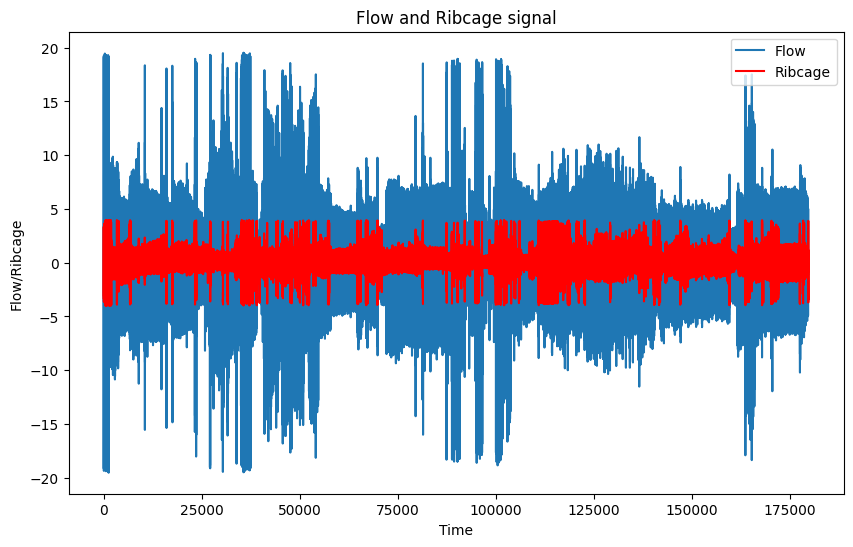

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(10, 6))
plt.plot(signals[8])
plt.plot(signals[10], 'r')
plt.xlabel('Time')
plt.ylabel('Flow/Ribcage')
plt.title('Flow and Ribcage signal')
plt.legend(['Flow', 'Ribcage'])

### Observation
Normalize flow and ribcage signal so that they have the same range on y axis

Shape of signals: (179760,)


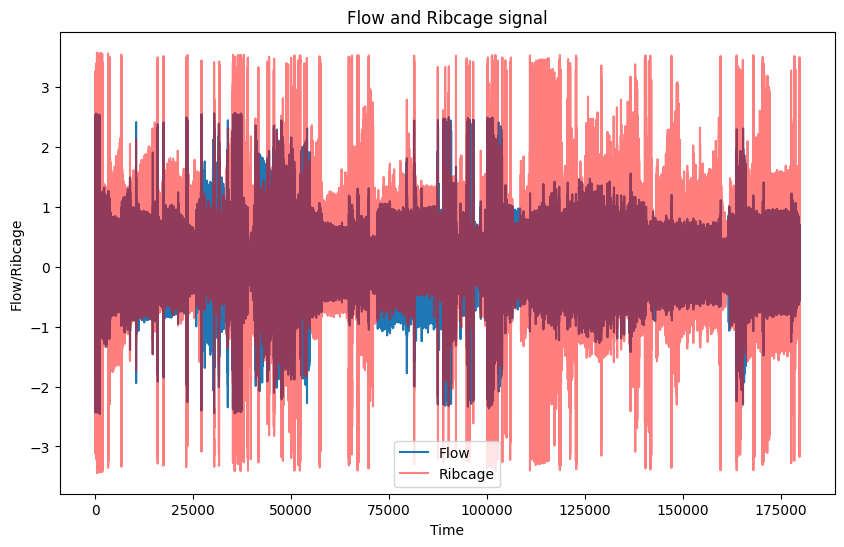

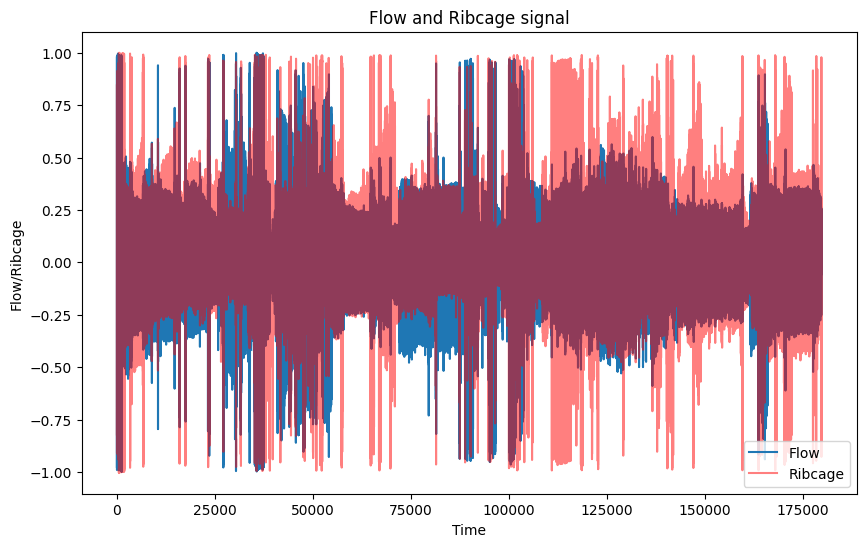

In [3]:
import numpy as np
from sklearn.preprocessing import RobustScaler


print("Shape of signals:", signals[8].shape)
signals_stacked = np.column_stack([signals[8], signals[10]])

scaler = RobustScaler()
scaled_signals = scaler.fit_transform(signals_stacked)

flow_scaled = scaled_signals[:, 0]
ribcage_scaled = scaled_signals[:, 1]

# normalizer = Normalizer()
# X2 = normalizer.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.plot(flow_scaled)
plt.plot(ribcage_scaled, 'r', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Flow/Ribcage')
plt.title('Flow and Ribcage signal')
plt.legend(['Flow', 'Ribcage'])


plt.figure(figsize=(10, 6))
plt.plot(signals[8]/np.max(signals[8]))
plt.plot(signals[10]/np.max(signals[10]), 'r', alpha=0.5)   
plt.xlabel('Time')
plt.ylabel('Flow/Ribcage')
plt.title('Flow and Ribcage signal')
plt.legend(['Flow', 'Ribcage'])

## Plotting sleep signal (EDA)

-------------------------------------------------------------------------------------------
Distribution of sleep stages in all the files:
2 (array([0, 1, 2, 3, 4, 5]), array([121, 155, 213, 172,  29,  58], dtype=int64))
3 (array([0, 1, 2, 3, 4, 5]), array([168, 190, 106, 254,  51, 113], dtype=int64))
5 (array([0, 1, 2, 3, 4, 5]), array([309, 125,  89, 251,   8,  44], dtype=int64))
6 (array([0, 1, 2, 3, 4, 5]), array([ 92, 192, 181,  95,  49, 199], dtype=int64))
7 (array([0, 1, 2, 3, 4, 5]), array([ 84, 132,  56, 414,  39,  88], dtype=int64))
8 (array([0, 1, 2, 3, 4, 5, 8]), array([263,  33,  76, 302,  46,  37,  11], dtype=int64))
9 (array([0, 1, 2, 3, 4, 5]), array([190,  89, 261, 244,  25, 116], dtype=int64))
10 (array([0, 1, 2, 3, 4, 5]), array([ 74, 169, 120, 465,  32,  47], dtype=int64))
11 (array([0, 1, 2, 3, 4, 5]), array([356,  42,  89, 295,  52,  66], dtype=int64))
12 (array([0, 1, 2, 3, 4, 5]), array([129, 194,  58, 337,  31, 115], dtype=int64))
13 (array([0, 1, 2, 3, 4, 5]),

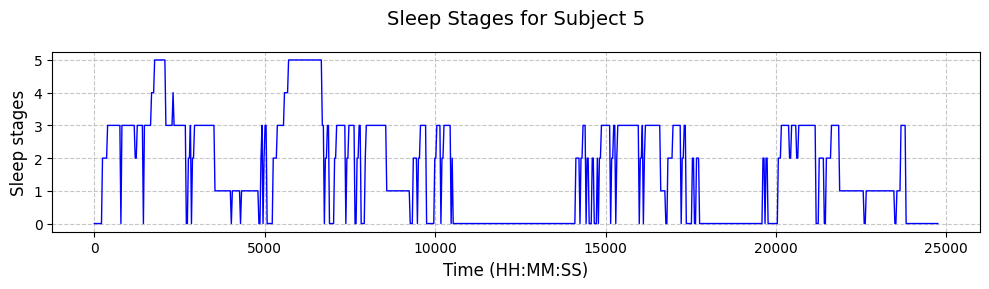

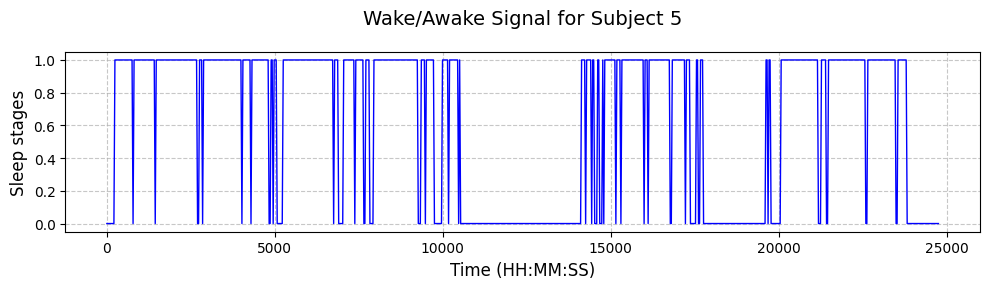

In [4]:
print("-------------------------------------------------------------------------------------------")
print("Distribution of sleep stages in all the files:")
for i in range(2, 10):
    try:
        sleep_stages_ = np.loadtxt(f"dataset/files/ucddb00{i}_stage.txt", dtype=int)
    except:
        continue
    print(i, np.unique(sleep_stages_, return_counts=True))


for i in range(1, 29):
    try:
        sleep_stages_ = np.loadtxt(f"dataset/files/ucddb0{i}_stage.txt", dtype=int)
    except:
        continue
    print(i, np.unique(sleep_stages_, return_counts=True))
print("-------------------------------------------------------------------------------------------")


sleep_stages_label = np.loadtxt(f"idk/files/ucddb005_stage.txt", dtype=int)
sleep_stages_label
times = pd.Index(np.arange(0, len(sleep_stages_label) * 30, 30))

fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(times, sleep_stages_label, color='blue', label='Wake/Awake', linewidth=1)
ax.set_xlabel('Time (HH:MM:SS)', fontsize=12)
ax.set_ylabel('Sleep stages', fontsize=12)
ax.set_title('Sleep Stages for Subject 5', fontsize=14, pad=20)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#---------------------------------------------------
# Note: 0 denotes awake
fig, ax = plt.subplots(figsize=(10, 3))
wake_awake_label_signal = (sleep_stages_label > 0).astype(int)
np.unique(wake_awake_label_signal, return_counts=True)

ax.plot(times, wake_awake_label_signal, color='blue', label='Wake/Awake', linewidth=1)

ax.set_xlabel('Time (HH:MM:SS)', fontsize=12)
ax.set_ylabel('Sleep stages', fontsize=12)
ax.set_title('Wake/Awake Signal for Subject 5', fontsize=14, pad=20)

ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Creating DataSet

In [5]:
x_list = []
y_list = []

for i in range(2, 29):
    try:
        if i<10:
            sleep_stages = np.loadtxt(f"dataset/files/ucddb00{i}_stage.txt", dtype=int)
            edf_file_path = f"./dataset/files/ucddb00{i}.rec"
            signals, labels, sampling_rates = read_edf_signals(edf_file_path)
        else:
            sleep_stages = np.loadtxt(f"dataset/files/ucddb0{i}_stage.txt", dtype=int)
            edf_file_path = f"./dataset/files/ucddb0{i}.rec"
            signals, labels, sampling_rates = read_edf_signals(edf_file_path)

        signals_stacked = np.column_stack([signals[8], signals[10]])
        scaler = RobustScaler()
        scaled_signals = scaler.fit_transform(signals_stacked)
        flow_scaled = scaled_signals[:, 0]
        ribcage_scaled = scaled_signals[:, 1]

        flow_scaled = flow_scaled[:len(sleep_stages)*240]
        ribcage_scaled = ribcage_scaled[:len(sleep_stages)*240]

        sleep_stages_remove_indices = []
        signal_remove_indices = []
        for j in range(len(sleep_stages)):
            if sleep_stages[j] == 8:
                sleep_stages_remove_indices.append(j)
                _indices = np.arange(j*240, (j+1)*240)
                signal_remove_indices.extend(_indices)
        
        flow_scaled = np.delete(flow_scaled, signal_remove_indices)
        ribcage_scaled = np.delete(ribcage_scaled, signal_remove_indices)
        sleep_stages = np.delete(sleep_stages, sleep_stages_remove_indices)

        reshaped1 = flow_scaled.reshape(-1, 240)
        reshaped2 = ribcage_scaled.reshape(-1, 240)

        sleep_stages = sleep_stages.reshape(-1, 1)
        flow_ribcage = np.stack([reshaped1, reshaped2], axis=1)
        x_list.append(flow_ribcage)
        y_list.append(sleep_stages)
    except:
        print(f"Error in file {i}")
        continue

print("-------------------------------------------------------------------------------------------")
for i in range(len(x_list)):
     print(f"File {i} has {len(x_list)} signals", \
        "\nsamples [nasal, ribcage]", f"[{len(signals[8])}, {len(signals[10])}]", \
        "\nsampling rate [nasal, ribcage]", f"[{sampling_rates[8]}, {sampling_rates[10]}]",\
        "\nno of sleep stages", len(x_list[i])* len(x_list[0][1][0])/(30*sampling_rates[8]), len(x_list[i])* len(x_list[0][1][0])/(30*sampling_rates[10]),  \
        "\nSleep stages: ", len(y_list[i])) 
     print()



Error in file 4
Error in file 16
-------------------------------------------------------------------------------------------
File 0 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 748.0 748.0 
Sleep stages:  748

File 1 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 882.0 882.0 
Sleep stages:  882

File 2 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 826.0 826.0 
Sleep stages:  826

File 3 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 808.0 808.0 
Sleep stages:  808

File 4 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 813.0 813.0 
Sleep stages:  813

File 5 has 25 signals 
samples [nasal, ribcage] [173280, 173280] 
samp

In [6]:
print(y_list[0].shape, x_list[0].shape)

(748, 1) (748, 2, 240)


In [7]:
y_binary_list = []
for i in range(len(y_list)):
    y_binary = (y_list[i] > 0).astype(int)
    y_binary_list.append(y_binary)

In [ ]:
for i in range(len(y_list)):
    print(np.unique(y_list[i], return_counts=True))

(array([0, 1, 2, 3, 4, 5]), array([121, 155, 213, 172,  29,  58], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([168, 190, 106, 254,  51, 113], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([309, 125,  89, 251,   8,  44], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([ 92, 192, 181,  95,  49, 199], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([ 84, 132,  56, 414,  39,  88], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([263,  33,  76, 302,  46,  37], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([190,  89, 261, 244,  25, 116], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([ 74, 169, 120, 465,  32,  47], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([356,  42,  89, 295,  52,  66], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([129, 194,  58, 337,  31, 115], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([317,  67, 143, 173,  16,  95], dtype=int64))
(array([0, 1, 2, 3]), array([165,  82, 260, 267], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([208,  68, 200, 294,  

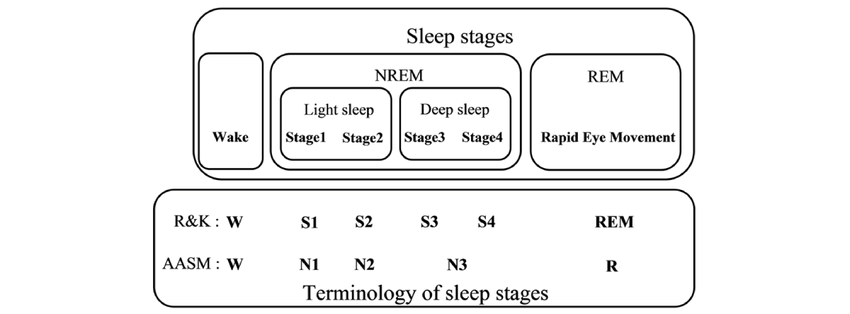

Source: https://www.researchgate.net/publication/343159161_Sleep_monitoring_systems_Current_status_and_future_challenges_Preprint

In [9]:
print(y_list[0].shape, x_list[0].shape)

(748, 1) (748, 2, 240)


In [10]:
y_3_stage_list = []
for i in range(len(y_list)):
    # 0 -> wake, 1 -> REM, 2,3,4,5 -> NREM
    y_3_stage = np.zeros_like(y_list[i])
    y_3_stage[y_list[i] == 1] = 1 # REM
    y_3_stage[y_list[i] == 2] = 2
    y_3_stage[y_list[i] == 3] = 2
    y_3_stage[y_list[i] == 4] = 2
    y_3_stage[y_list[i] == 5] = 2

    # 0 -> wake, 1 -> REM, 2 -> NREM
    y_3_stage_list.append(y_3_stage)

In [11]:
y_4_stage_list = []
for i in range(len(y_list)):
    # 0 -> wake, 1 -> REM, 2,3 -> Light Sleep, 4,5 -> Deep Sleep
    y_4_stage = np.zeros_like(y_list[i])
    y_4_stage[y_list[i] == 1] = 1 # REM
    y_4_stage[y_list[i] == 2] = 2
    y_4_stage[y_list[i] == 3] = 2
    y_4_stage[y_list[i] == 4] = 3
    y_4_stage[y_list[i] == 5] = 3

    # 0 -> wake, 1 -> REM, 2 -> Light Sleep, 3 -> Deep Sleep

    y_4_stage_list.append(y_4_stage)

In [12]:
print(np.unique(y_3_stage_list[0], return_counts=True))
print(np.unique(y_binary_list[0], return_counts=True))
print(np.unique(y_4_stage_list[0], return_counts=True))
np.unique(y_list[0], return_counts=True)

(array([0, 1, 2]), array([121, 155, 472], dtype=int64))
(array([0, 1]), array([121, 627], dtype=int64))
(array([0, 1, 2, 3]), array([121, 155, 385,  87], dtype=int64))


(array([0, 1, 2, 3, 4, 5]), array([121, 155, 213, 172,  29,  58], dtype=int64))

## Classification

## Hyper Parameter Tuning

In [13]:
X_train = np.concatenate(x_list[:-1], axis=0)
X_test = x_list[-1]
y_train = np.concatenate(y_binary_list[:-1], axis=0)
y_test = y_binary_list[-1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20053, 2, 240) (721, 2, 240) (20053, 1) (721, 1)


In [14]:
import tsfel
import pandas as pd

cfg = tsfel.get_features_by_domain()

features_list = []
n_channels = X_train.shape[1]

data = np.transpose(X_train, (0, 2, 1))
features = tsfel.time_series_features_extractor(cfg, data, fs=8)
features_list.append(features)
tsfel_x_train = pd.concat(features_list, axis=1)
print(tsfel_x_train.shape)


(20053, 312)


In [15]:
cfg = tsfel.get_features_by_domain()

features_list_test = []
n_channels = X_test.shape[1]

data_test = np.transpose(X_test, (0, 2, 1))
features_test = tsfel.time_series_features_extractor(cfg, data_test, fs=8)
features_list_test.append(features_test)

tsfel_x_test = pd.concat(features_list_test, axis=1)
print(tsfel_x_test.shape)


(721, 312)


In [16]:
tsfel_x_test.to_csv('tsfel_x_test.csv', index=False)
tsfel_x_train.to_csv('tsfel_x_train.csv', index=False)

In [26]:
X_train.shape

(20053, 2, 240)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 150),        
    'max_depth': randint(2, 7),            
    'max_features': ['sqrt', 'log2', None]      
}

rf = RandomForestClassifier(random_state=42, verbose=4)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,            
    cv=5,                 
    scoring=['accuracy', 'balanced_accuracy'] ,  
    refit='balanced_accuracy', 
    n_jobs=-1,         
    random_state=42,
    verbose=4    
)

random_search.fit(tsfel_x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


building tree 1 of 71
building tree 2 of 71
building tree 3 of 71
building tree 4 of 71
building tree 5 of 71
building tree 6 of 71
building tree 7 of 71
building tree 8 of 71
building tree 9 of 71
building tree 10 of 71
building tree 11 of 71
building tree 12 of 71
building tree 13 of 71
building tree 14 of 71
building tree 15 of 71
building tree 16 of 71
building tree 17 of 71
building tree 18 of 71
building tree 19 of 71
building tree 20 of 71
building tree 21 of 71
building tree 22 of 71
building tree 23 of 71
building tree 24 of 71


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:   51.0s


building tree 25 of 71
building tree 26 of 71
building tree 27 of 71
building tree 28 of 71
building tree 29 of 71
building tree 30 of 71
building tree 31 of 71
building tree 32 of 71
building tree 33 of 71
building tree 34 of 71
building tree 35 of 71
building tree 36 of 71
building tree 37 of 71
building tree 38 of 71
building tree 39 of 71
building tree 40 of 71
building tree 41 of 71
building tree 42 of 71
building tree 43 of 71
building tree 44 of 71
building tree 45 of 71
building tree 46 of 71
building tree 47 of 71
building tree 48 of 71
building tree 49 of 71
building tree 50 of 71
building tree 51 of 71
building tree 52 of 71
building tree 53 of 71
building tree 54 of 71
building tree 55 of 71
building tree 56 of 71
building tree 57 of 71
building tree 58 of 71
building tree 59 of 71
building tree 60 of 71
building tree 61 of 71
building tree 62 of 71
building tree 63 of 71
building tree 64 of 71
building tree 65 of 71
building tree 66 of 71
building tree 67 of 71
building tr

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 150),        
    'max_depth': randint(2, 7),
}

rf = XGBClassifier(random_state=42, verbose=4, class_weight='balanced')

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,            
    cv=5,                 
    scoring=['balanced_accuracy', 'accuracy'] ,  
    refit='balanced_accuracy', 
    n_jobs=-1,         
    random_state=42,
    verbose=4    
)

random_search.fit(tsfel_x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:40:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'max_depth': 4, 'n_estimators': 91}
Best Accuracy: 0.2880144041922745


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
clf_tsfel = DecisionTreeClassifier(random_state=42)

clf_tsfel.fit(tsfel_x_train, y_train)

y_pred = clf_tsfel.predict(tsfel_x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

Accuracy: 0.624133148404993
Precision: 0.5992014270949902
Recall: 0.624133148404993
Confusion Matrix:
[[ 65 163]
 [108 385]]
Specificity: 0.2850877192982456


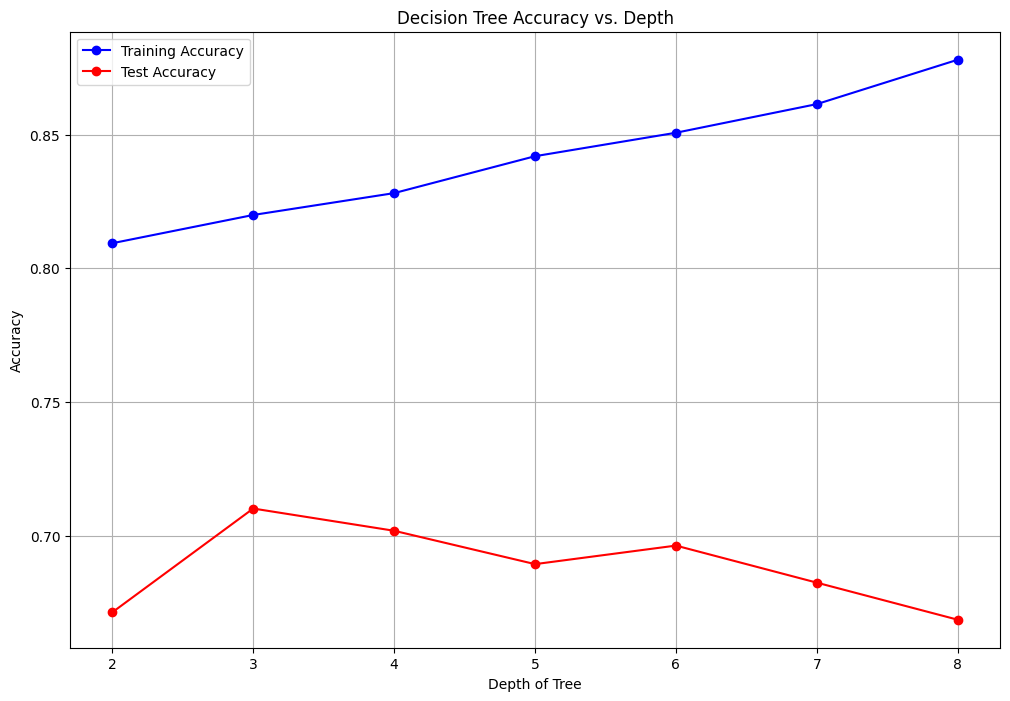

In [ ]:
depths = range(2, 9)
train_accuracies = []
test_accuracies = []

# Train and evaluate the model with varying depths
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(tsfel_x_train, y_train)

    train_accuracy = clf.score(tsfel_x_train, y_train)
    train_accuracies.append(train_accuracy)

    test_accuracy = clf.score(tsfel_x_test, y_test)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(12, 8))
plt.plot(depths, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(depths, test_accuracies, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
clf_tsfel = DecisionTreeClassifier(max_depth=3, random_state=42)

clf_tsfel.fit(tsfel_x_train, y_train)

y_pred = clf_tsfel.predict(tsfel_x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

Accuracy: 0.710124826629681
Precision: 0.6975882234670883
Recall: 0.710124826629681
Confusion Matrix:
[[ 39 189]
 [ 20 473]]
Specificity: 0.17105263157894737


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=71, max_depth=6, max_features= None, class_weight="balanced", random_state=42)
clf_rf.fit(tsfel_x_train, y_train.reshape(-1))
# y_pred_rf = clf_rf.predict(tsfel_x_test)
y_prob_rf = clf_rf.predict_proba(tsfel_x_test)[:, 1]  # Get probabilities for class 1
threshold = 0.7  # Increase this threshold
y_pred_rf = (y_prob_rf >= threshold).astype(int)  # Convert probabilities to class labels

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
specificity_rf = tn / (tn+fp)
print(f"Specificity: {specificity_rf}")

Accuracy: 0.5325936199722607
Precision: 0.6677469530448492
Recall: 0.5325936199722607
Confusion Matrix:
[[176  52]
 [285 208]]
Specificity: 0.7719298245614035


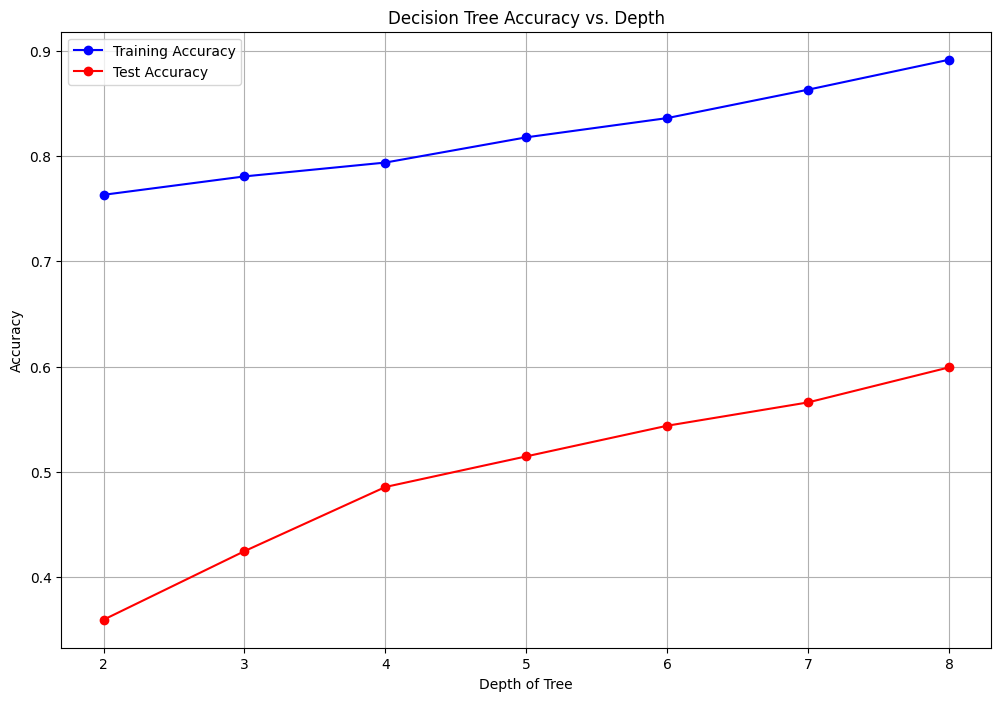

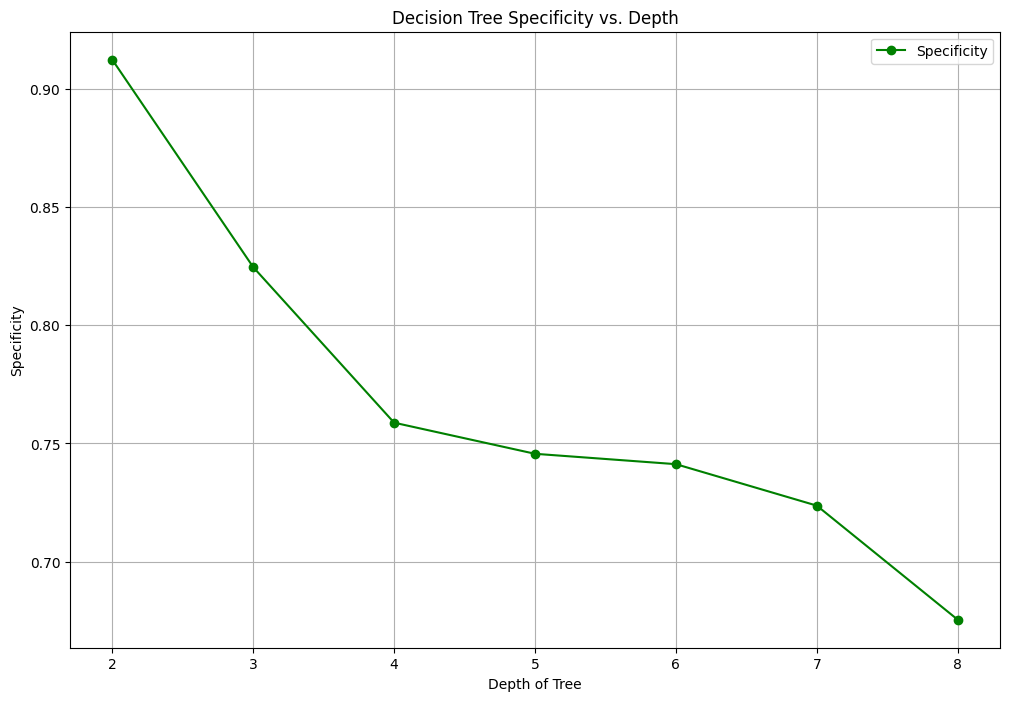

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

depths = range(2, 9)
train_accuracies = []
test_accuracies = []
specificities = []

threshold = 0.6  

for depth in depths:
    clf = RandomForestClassifier(n_estimators=100, max_depth=depth, class_weight="balanced", random_state=42)
    clf.fit(tsfel_x_train, y_train.reshape(-1))
    
    train_accuracy = clf.score(tsfel_x_train, y_train)
    train_accuracies.append(train_accuracy)
    
    y_prob = clf.predict_proba(tsfel_x_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(test_accuracy)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

plt.figure(figsize=(12, 8))
plt.plot(depths, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(depths, test_accuracies, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(depths, specificities, marker='o', linestyle='-', color='g', label='Specificity')
plt.xlabel('Depth of Tree')
plt.ylabel('Specificity')
plt.title('Decision Tree Specificity vs. Depth')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()


In [52]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42)
clf_xgb.fit(tsfel_x_train, y_train)

threshold = 0.7  # Custom threshold

# y_pred_xgb = clf_xgb.predict(tsfel_x_test)
y_prob = clf_xgb.predict_proba(tsfel_x_test)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred, average='weighted')
recall_xgb = recall_score(y_test, y_pred, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity_xgb = tn / (tn+fp)
print(f"Specificity: {specificity_xgb}")

d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7004160887656034
Precision: 0.6797776327976517
Recall: 0.7004160887656034
Confusion Matrix:
[[ 84 144]
 [ 72 421]]
Specificity: 0.3684210526315789


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:24:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:24:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:24:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
d:\clg_stuff\ML project\.venv\lib\site-pack

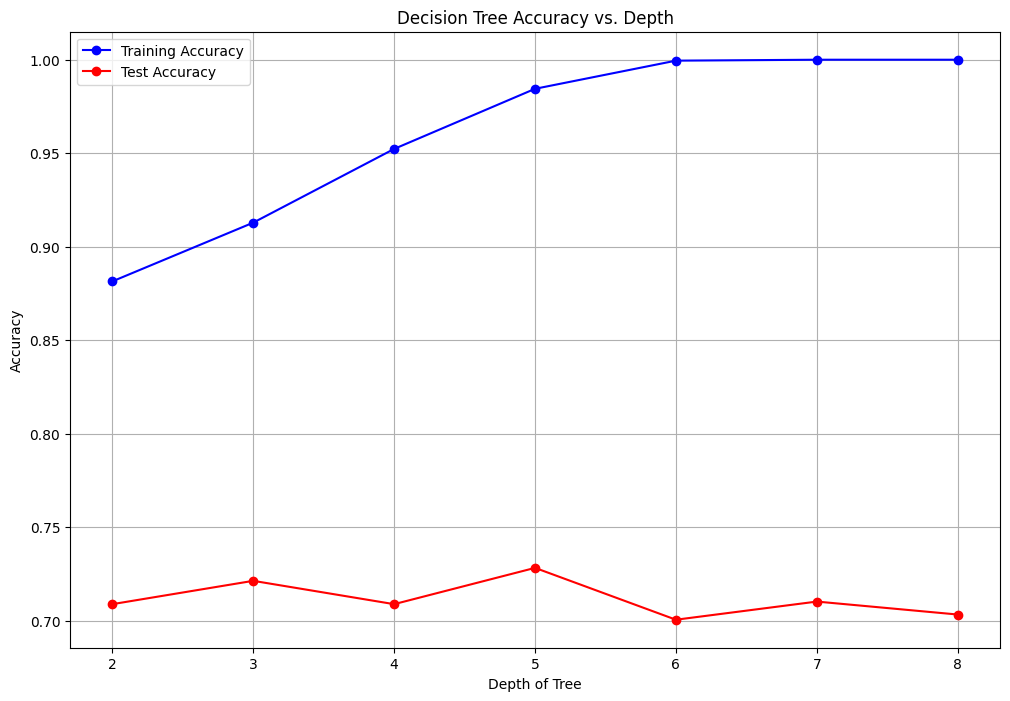

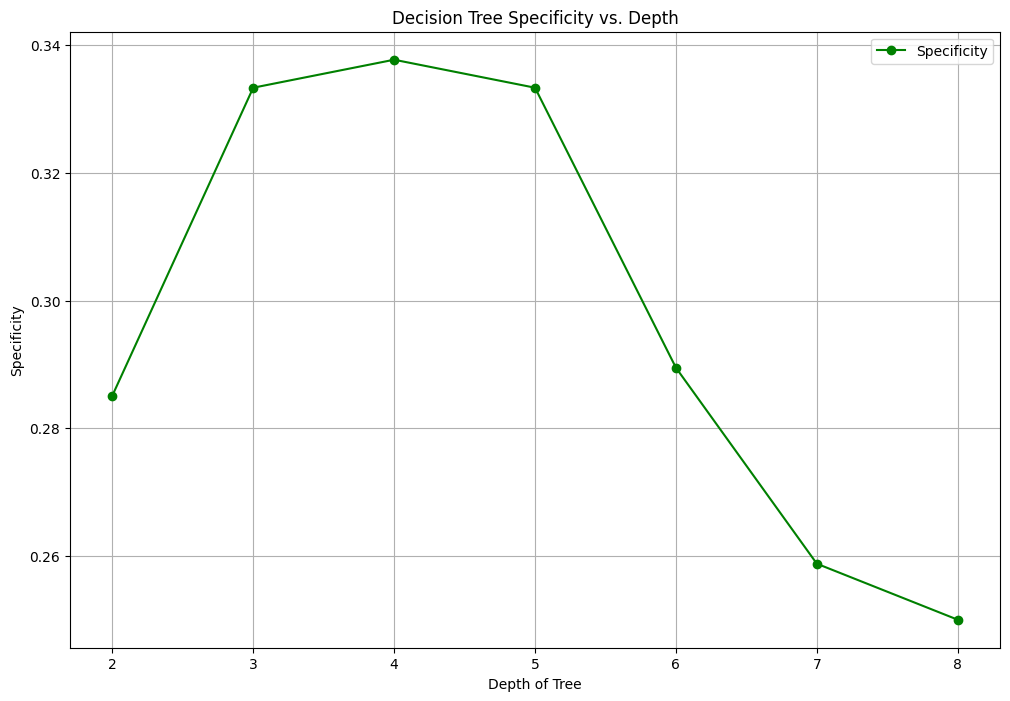

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the depths and initialize lists
depths = range(2, 9)
train_accuracies = []
test_accuracies = []
specificities = []

threshold = 0.6  # Custom threshold

# Train and evaluate the model with varying depths
for depth in depths:
    clf = XGBClassifier(n_estimators=100, max_depth=depth, class_weight="balanced", random_state=42)
    clf.fit(tsfel_x_train, y_train)
    
    # Evaluate training accuracy
    train_accuracy = clf.score(tsfel_x_train, y_train.reshape(-1))
    train_accuracies.append(train_accuracy)
    
    # Get predicted probabilities and apply custom threshold for test set
    y_prob = clf.predict_proba(tsfel_x_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(test_accuracy)
    
    # Calculate specificity: TN / (TN + FP)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

# Plot Accuracy vs. Depth
plt.figure(figsize=(12, 8))
plt.plot(depths, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(depths, test_accuracies, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()

# Plot Specificity vs. Depth
plt.figure(figsize=(12, 8))
plt.plot(depths, specificities, marker='o', linestyle='-', color='g', label='Specificity')
plt.xlabel('Depth of Tree')
plt.ylabel('Specificity')
plt.title('Decision Tree Specificity vs. Depth')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()


## 2 class classification

## 3 class classification

## 4 class classification

In [ ]:
X_train = np.concatenate(x_list[:-1], axis=0)
X_test = x_list[-1]
y_train = np.concatenate(y_binary_list[:-1], axis=0)
y_test = y_binary_list[-1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

## 6 class classification

## 3 class classification

In [55]:
X_train = np.concatenate(x_list[:-1], axis=0)
X_test = x_list[-1]
y_train = np.concatenate(y_3_stage_list[:-1], axis=0)
y_test = y_3_stage_list[-1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20053, 2, 240) (721, 2, 240) (20053, 1) (721, 1)


In [66]:
clf_tsfel = DecisionTreeClassifier(max_depth=3, random_state=42)

clf_tsfel.fit(tsfel_x_train, y_train)

y_pred = clf_tsfel.predict(tsfel_x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)
specificities = []

for i in range(conf_matrix.shape[0]):  # Iterate over each class
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

print(f"Specificities per class: {specificities}")
print(f"Average Specificity: {np.mean(specificities)}")

Accuracy: 0.579750346740638
Precision: 0.6530021197871536
Recall: 0.579750346740638
Confusion Matrix:
[[ 40   0 188]
 [  3   0  93]
 [ 19   0 378]]
Specificities per class: [0.9553752535496958, 1.0, 0.13271604938271606]
Average Specificity: 0.696030434310804


In [68]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=71, max_depth=6, random_state=42)
clf_rf.fit(tsfel_x_train, y_train.reshape(-1))
# y_pred_rf = clf_rf.predict(tsfel_x_test)
y_prob_rf = clf_rf.predict_proba(tsfel_x_test)[:, 1]  # Get probabilities for class 1
threshold = 0.7  # Increase this threshold
y_pred_rf = (y_prob_rf >= threshold).astype(int)  # Convert probabilities to class labels

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)

conf_matrix = confusion_matrix(y_test, y_pred)
specificities = []

for i in range(conf_matrix.shape[0]):  # Iterate over each class
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

print(f"Specificities per class: {specificities}")
print(f"Average Specificity: {np.mean(specificities)}")

Accuracy: 0.31622746185852985
Precision: 0.783772345774958
Recall: 0.31622746185852985
Confusion Matrix:
[[228   0   0]
 [ 96   0   0]
 [397   0   0]]
Specificities per class: [0.9553752535496958, 1.0, 0.13271604938271606]
Average Specificity: 0.696030434310804


In [64]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42)
clf_xgb.fit(tsfel_x_train, y_train)

threshold = 0.7  # Custom threshold

# y_pred_xgb = clf_xgb.predict(tsfel_x_test)
y_prob = clf_xgb.predict_proba(tsfel_x_test)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_xgb = recall_score(y_test, y_pred, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)

conf_matrix = confusion_matrix(y_test, y_pred)
specificities = []

for i in range(conf_matrix.shape[0]):  # Iterate over each class
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

print(f"Specificities per class: {specificities}")
print(f"Average Specificity: {np.mean(specificities)}")

d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.31761442441054094
Precision: 0.7169896104249786
Recall: 0.31761442441054094
Confusion Matrix:
[[225   3   0]
 [ 92   4   0]
 [396   1   0]]
Specificities per class: [0.010141987829614604, 0.9936, 1.0]
Average Specificity: 0.6679139959432048


## 4 class Classification

In [70]:
X_train = np.concatenate(x_list[:-1], axis=0)
X_test = x_list[-1]
y_train = np.concatenate(y_4_stage_list[:-1], axis=0)
y_test = y_4_stage_list[-1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20053, 2, 240) (721, 2, 240) (20053, 1) (721, 1)


In [71]:
clf_tsfel = DecisionTreeClassifier(max_depth=3, random_state=42)

clf_tsfel.fit(tsfel_x_train, y_train)

y_pred = clf_tsfel.predict(tsfel_x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)
specificities = []

for i in range(conf_matrix.shape[0]):  # Iterate over each class
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

print(f"Specificities per class: {specificities}")
print(f"Average Specificity: {np.mean(specificities)}")

Accuracy: 0.507628294036061
Precision: 0.6431192183545593
Recall: 0.507628294036061
Confusion Matrix:
[[ 40   0 188   0]
 [  2   0  94   0]
 [ 19   0 326   0]
 [  2   0  50   0]]
Specificities per class: [0.9533468559837728, 1.0, 0.11702127659574468, 1.0]
Average Specificity: 0.7675920331448793


In [76]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=71, max_depth=6, random_state=42)
clf_rf.fit(tsfel_x_train, y_train.reshape(-1))
# y_pred_rf = clf_rf.predict(tsfel_x_test)
y_prob_rf = clf_rf.predict_proba(tsfel_x_test)[:, 1]  # Get probabilities for class 1
threshold = 0.7  # Increase this threshold
y_pred_rf = (y_prob_rf >= threshold).astype(int)  # Convert probabilities to class labels

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)

conf_matrix = confusion_matrix(y_test, y_pred)
specificities = []

for i in range(conf_matrix.shape[0]):  # Iterate over each class
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

print(f"Specificities per class: {specificities}")
print(f"Average Specificity: {np.mean(specificities)}")

Accuracy: 0.31622746185852985
Precision: 0.783772345774958
Recall: 0.31622746185852985
Confusion Matrix:
[[228   0   0   0]
 [ 96   0   0   0]
 [345   0   0   0]
 [ 52   0   0   0]]
Specificities per class: [0.030425963488843813, 0.976, 1.0, 1.0]
Average Specificity: 0.7516064908722109


In [77]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42)
clf_xgb.fit(tsfel_x_train, y_train)

threshold = 0.7  # Custom threshold

# y_pred_xgb = clf_xgb.predict(tsfel_x_test)
y_prob = clf_xgb.predict_proba(tsfel_x_test)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_xgb = recall_score(y_test, y_pred, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)

conf_matrix = confusion_matrix(y_test, y_pred)
specificities = []

for i in range(conf_matrix.shape[0]):  # Iterate over each class
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

print(f"Specificities per class: {specificities}")
print(f"Average Specificity: {np.mean(specificities)}")

d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:20:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.31622746185852985
Precision: 0.6949613493302813
Recall: 0.31622746185852985
Confusion Matrix:
[[226   2   0   0]
 [ 94   2   0   0]
 [343   2   0   0]
 [ 52   0   0   0]]
Specificities per class: [0.008113590263691683, 0.9936, 1.0, 1.0]
Average Specificity: 0.7504283975659229


## 6 class classification

In [83]:
np.unique(y_list[0], return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([121, 155, 213, 172,  29,  58], dtype=int64))

In [84]:
X_train = np.concatenate(x_list[:-1], axis=0)
X_test = x_list[-1]
y_train = np.concatenate(y_list[:-1], axis=0)
y_test = y_list[-1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20053, 2, 240) (721, 2, 240) (20053, 1) (721, 1)


In [85]:
clf_tsfel = DecisionTreeClassifier(max_depth=3, random_state=42)

clf_tsfel.fit(tsfel_x_train, y_train)

y_pred = clf_tsfel.predict(tsfel_x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)
specificities = []

for i in range(conf_matrix.shape[0]):  # Iterate over each class
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

print(f"Specificities per class: {specificities}")
print(f"Average Specificity: {np.mean(specificities)}")

Accuracy: 0.3287101248266297
Precision: 0.6461295921070667
Recall: 0.3287101248266297
Confusion Matrix:
[[ 50   0   0 178   0   0]
 [  7   0   0  89   0   0]
 [ 19   0   0 121   0   0]
 [ 18   0   0 187   0   0]
 [  2   0   0  21   0   0]
 [  2   0   0  27   0   0]]
Specificities per class: [0.9026369168356998, 1.0, 1.0, 0.15503875968992248, 1.0, 1.0]
Average Specificity: 0.8429459460876038


In [88]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=71, max_depth=6, random_state=42)
clf_rf.fit(tsfel_x_train, y_train.reshape(-1))
# y_pred_rf = clf_rf.predict(tsfel_x_test)
y_prob_rf = clf_rf.predict_proba(tsfel_x_test)[:, 1]  # Get probabilities for class 1
threshold = 0.7  # Increase this threshold
y_pred_rf = (y_prob_rf >= threshold).astype(int)  # Convert probabilities to class labels

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
specificities = []

for i in range(conf_matrix.shape[0]):  # Iterate over each class
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

print(f"Specificities per class: {specificities}")
print(f"Average Specificity: {np.mean(specificities)}")

Accuracy: 0.31622746185852985
Precision: 0.783772345774958
Recall: 0.31622746185852985
Confusion Matrix:
[[228   0   0   0   0   0]
 [ 96   0   0   0   0   0]
 [140   0   0   0   0   0]
 [205   0   0   0   0   0]
 [ 23   0   0   0   0   0]
 [ 29   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334


In [87]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42)
clf_xgb.fit(tsfel_x_train, y_train)

threshold = 0.7  # Custom threshold

# y_pred_xgb = clf_xgb.predict(tsfel_x_test)
y_prob = clf_xgb.predict_proba(tsfel_x_test)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall_xgb = recall_score(y_test, y_pred, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)

conf_matrix = confusion_matrix(y_test, y_pred)
specificities = []

for i in range(conf_matrix.shape[0]):  # Iterate over each class
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

print(f"Specificities per class: {specificities}")
print(f"Average Specificity: {np.mean(specificities)}")

d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.32038834951456313
Precision: 0.7510431235093054
Recall: 0.32038834951456313
Confusion Matrix:
[[228   0   0   0   0   0]
 [ 93   3   0   0   0   0]
 [139   1   0   0   0   0]
 [205   0   0   0   0   0]
 [ 23   0   0   0   0   0]
 [ 29   0   0   0   0   0]]
Specificities per class: [0.008113590263691683, 0.9984, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8344189317106153


## Cross validation

In [90]:
X = np.concatenate(x_list, axis=0)
Y = np.concatenate(y_binary_list, axis=0)

print(X.shape, Y.shape)

import tsfel
import pandas as pd

cfg = tsfel.get_features_by_domain()

features_list = []

data = np.transpose(X, (0, 2, 1))
features = tsfel.time_series_features_extractor(cfg, data, fs=8)
features_list.append(features)
tsfel_x = pd.concat(features_list, axis=1)
print(tsfel_x.shape)

(20774, 2, 240) (20774, 1)


(20774, 312)


In [95]:
indices = []
sum = 0
for i in range(0, len(x_list)):
    sum += x_list[i].shape[0]
    indices.append(sum)

In [99]:
train_x_tsfel = []
print(tsfel_x.shape)

for i in range(len(x_list)):
    if i == 0:
        train_x_tsfel.append(tsfel_x[:indices[i]])
    else:
        train_x_tsfel.append(tsfel_x[indices[i-1]:indices[i]])

(20774, 312)


Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8756684491978609
Precision: 0.863407266954758
Recall: 0.8756684491978609
Confusion Matrix:
[[ 43  78]
 [ 15 612]]
Specificity: 0.35537190082644626
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8866213151927438
Precision: 0.8804271284271284
Recall: 0.8866213151927438
Confusion Matrix:
[[100  68]
 [ 32 682]]
Specificity: 0.5952380952380952
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.7953995157384988
Precision: 0.7955493084909919
Recall: 0.7953995157384988
Confusion Matrix:
[[188 121]
 [ 48 469]]
Specificity: 0.6084142394822006
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8650990099009901
Precision: 0.897657683639966
Recall: 0.8650990099009901
Confusion Matrix:
[[ 63  29]
 [ 80 636]]
Specificity: 0.6847826086956522
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8905289052890529
Precision: 0.8738487996537436
Recall: 0.8905289052890529
Confusion Matrix:
[[ 25  59]
 [ 30 699]]
Specificity: 0.2976190476190476
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.7569352708058125
Precision: 0.7947332756400018
Recall: 0.7569352708058125
Confusion Matrix:
[[ 88 175]
 [  9 485]]
Specificity: 0.33460076045627374
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8043243243243243
Precision: 0.7819571046017125
Recall: 0.8043243243243243
Confusion Matrix:
[[ 66 124]
 [ 57 678]]
Specificity: 0.3473684210526316
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9349503858875413
Precision: 0.9295052489449751
Recall: 0.9349503858875413
Confusion Matrix:
[[ 37  37]
 [ 22 811]]
Specificity: 0.5
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.6044444444444445
Precision: 0.5653077905491698
Recall: 0.6044444444444445
Confusion Matrix:
[[ 15 341]
 [ 15 529]]
Specificity: 0.042134831460674156
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8182870370370371
Precision: 0.841955969467518
Recall: 0.8182870370370371
Confusion Matrix:
[[ 71  58]
 [ 99 636]]
Specificity: 0.5503875968992248
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.6744759556103576
Precision: 0.7746264125384255
Recall: 0.6744759556103576
Confusion Matrix:
[[ 55 262]
 [  2 492]]
Specificity: 0.17350157728706625
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8062015503875969
Precision: 0.8325903062524509
Recall: 0.8062015503875969
Confusion Matrix:
[[ 16 149]
 [  1 608]]
Specificity: 0.09696969696969697
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8264192139737991
Precision: 0.8164113381778713
Recall: 0.8264192139737991
Confusion Matrix:
[[ 73 135]
 [ 24 684]]
Specificity: 0.35096153846153844
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8833967046894804
Precision: 0.8636099512253776
Recall: 0.8833967046894804
Confusion Matrix:
[[ 30  73]
 [ 19 667]]
Specificity: 0.2912621359223301
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.6995133819951338
Precision: 0.7867336950721223
Recall: 0.6995133819951338
Confusion Matrix:
[[ 84 244]
 [  3 491]]
Specificity: 0.25609756097560976
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9061032863849765
Precision: 0.8988037987760134
Recall: 0.9061032863849765
Confusion Matrix:
[[ 25  46]
 [ 34 747]]
Specificity: 0.352112676056338
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.7752659574468085
Precision: 0.7683612929623569
Recall: 0.7752659574468085
Confusion Matrix:
[[ 77  92]
 [ 77 506]]
Specificity: 0.4556213017751479
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8378970427163198
Precision: 0.8148160369575977
Recall: 0.8378970427163198
Confusion Matrix:
[[ 38 128]
 [ 20 727]]
Specificity: 0.2289156626506024
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.6607369758576874
Precision: 0.7320186599092193
Recall: 0.6607369758576874
Confusion Matrix:
[[ 71 256]
 [ 11 449]]
Specificity: 0.21712538226299694
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.7386759581881533
Precision: 0.7265897363458339
Recall: 0.7386759581881533
Confusion Matrix:
[[126 156]
 [ 69 510]]
Specificity: 0.44680851063829785
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8174778761061947
Precision: 0.8078017494986851
Recall: 0.8174778761061947
Confusion Matrix:
[[ 62  93]
 [ 72 677]]
Specificity: 0.4
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.7580872011251758
Precision: 0.7560119178793958
Recall: 0.7580872011251758
Confusion Matrix:
[[ 75  88]
 [ 84 464]]
Specificity: 0.4601226993865031
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8902147971360382
Precision: 0.8825011696287391
Recall: 0.8902147971360382
Confusion Matrix:
[[ 26  86]
 [  6 720]]
Specificity: 0.23214285714285715
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.845464725643897
Precision: 0.8241439762183187
Recall: 0.845464725643897
Confusion Matrix:
[[ 37  90]
 [ 48 718]]
Specificity: 0.29133858267716534
-------------------------
Fold 25:
Accuracy: 0.710124826629681
Precision: 0.6963632367420368
Recall: 0.710124826629681
Confusion Matrix:
[[ 40 188]
 [ 21 472]]
Specificity: 0.17543859649122806
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.8025, Std: 0.0836
Precision - Mean: 0.8082, Std: 0.0762
Recall - Mean: 0.8025, Std: 0.0836
Specificity - Mean: 0.3498, Std: 0.1578


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


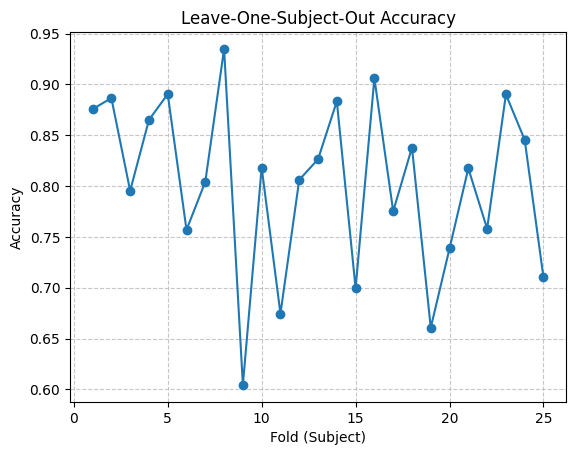

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_binary_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    clf = DecisionTreeClassifier(max_depth=3, random_state=42)

    clf.fit(train_features, train_labels)

    y_pred = clf.predict(test_features)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted')
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)


    tn, fp, fn, tp = confusion_matrix(test_labels, y_pred).ravel()
    specificity = tn / (tn+fp)
    print(f"Specificity: {specificity}")

    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)



    print("-------------------------")
    
    # if i in [0, 1, 15, 24]:
    #     plotter(test_results)
    # load_metrics(test_results)

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_binary_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    clf = RandomForestClassifier(n_estimators=71, max_depth=2, max_features= None, class_weight="balanced", random_state=42)

    clf.fit(train_features, train_labels)

    y_prob = clf.predict_proba(test_features)[:, 1] 
    threshold = 0.7
    y_pred = (y_prob >= threshold).astype(int) 

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted')
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)


    tn, fp, fn, tp = confusion_matrix(test_labels, y_pred).ravel()
    specificity = tn / (tn+fp)
    print(f"Specificity: {specificity}")

    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)


    print("-------------------------")


print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3181818181818182
Precision: 0.8692551505546751
Recall: 0.3181818181818182
Confusion Matrix:
[[121   0]
 [510 117]]
Specificity: 1.0
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.30952380952380953
Precision: 0.8507078507078508
Recall: 0.30952380952380953
Confusion Matrix:
[[168   0]
 [609 105]]
Specificity: 1.0
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.4975786924939467
Precision: 0.7855688066030794
Recall: 0.4975786924939467
Confusion Matrix:
[[309   0]
 [415 102]]
Specificity: 1.0
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.2871287128712871
Precision: 0.9018201221319737
Recall: 0.2871287128712871
Confusion Matrix:
[[ 92   0]
 [576 140]]
Specificity: 1.0
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.19557195571955718
Precision: 0.9084390843908439
Recall: 0.19557195571955718
Confusion Matrix:
[[ 84   0]
 [654  75]]
Specificity: 1.0
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.36591809775429324
Precision: 0.7755537815738615
Recall: 0.36591809775429324
Confusion Matrix:
[[263   0]
 [480  14]]
Specificity: 1.0
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.29945945945945945
Precision: 0.8411662258917629
Recall: 0.29945945945945945
Confusion Matrix:
[[190   0]
 [648  87]]
Specificity: 1.0
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1444321940463065
Precision: 0.9255152733640315
Recall: 0.1444321940463065
Confusion Matrix:
[[ 74   0]
 [776  57]]
Specificity: 1.0
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.42333333333333334
Precision: 0.7653790476190476
Recall: 0.42333333333333334
Confusion Matrix:
[[356   0]
 [519  25]]
Specificity: 1.0
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3333333333333333
Precision: 0.8780141843971632
Recall: 0.3333333333333333
Confusion Matrix:
[[129   0]
 [576 159]]
Specificity: 1.0
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.42293464858199753
Precision: 0.7669685141407556
Recall: 0.42293464858199753
Confusion Matrix:
[[317   0]
 [468  26]]
Specificity: 1.0
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.26744186046511625
Precision: 0.8348741898589401
Recall: 0.26744186046511625
Confusion Matrix:
[[165   0]
 [567  42]]
Specificity: 1.0
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.24126637554585154
Precision: 0.8252307930382471
Recall: 0.24126637554585154
Confusion Matrix:
[[208   0]
 [695  13]]
Specificity: 1.0
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.33713561470215464
Precision: 0.8909344541762331
Recall: 0.33713561470215464
Confusion Matrix:
[[103   0]
 [523 163]]
Specificity: 1.0
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.40632603406326034
Precision: 0.7613663470254282
Recall: 0.40632603406326034
Confusion Matrix:
[[328   0]
 [488   6]]
Specificity: 1.0
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.20774647887323944
Precision: 0.924597855227882
Recall: 0.20774647887323944
Confusion Matrix:
[[ 71   0]
 [675 106]]
Specificity: 1.0
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3723404255319149
Precision: 0.834517210475653
Recall: 0.3723404255319149
Confusion Matrix:
[[169   0]
 [472 111]]
Specificity: 1.0
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.25958378970427165
Precision: 0.8540272079464478
Recall: 0.25958378970427165
Confusion Matrix:
[[166   0]
 [676  71]]
Specificity: 1.0
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.43964421855146124
Precision: 0.7614110149301143
Recall: 0.43964421855146124
Confusion Matrix:
[[327   0]
 [441  19]]
Specificity: 1.0
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3426248548199768
Precision: 0.7813917559660771
Recall: 0.3426248548199768
Confusion Matrix:
[[282   0]
 [566  13]]
Specificity: 1.0
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.252212389380531
Precision: 0.860520963121519
Recall: 0.252212389380531
Confusion Matrix:
[[155   0]
 [676  73]]
Specificity: 1.0
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.2545710267229255
Precision: 0.8246682212926939
Recall: 0.2545710267229255
Confusion Matrix:
[[163   0]
 [530  18]]
Specificity: 1.0
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.29236276849642007
Precision: 0.8875810355625519
Recall: 0.29236276849642007
Confusion Matrix:
[[112   0]
 [593 133]]
Specificity: 1.0
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.24972004479283313
Precision: 0.880444724828971
Recall: 0.24972004479283313
Confusion Matrix:
[[127   0]
 [670  96]]
Specificity: 1.0
-------------------------
Fold 25:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3217753120665742
Precision: 0.7843302247575716
Recall: 0.3217753120665742
Confusion Matrix:
[[228   0]
 [489   4]]
Specificity: 1.0
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.3137, Std: 0.0818
Precision - Mean: 0.8390, Std: 0.0529
Recall - Mean: 0.3137, Std: 0.0818
Specificity - Mean: 1.0000, Std: 0.0000


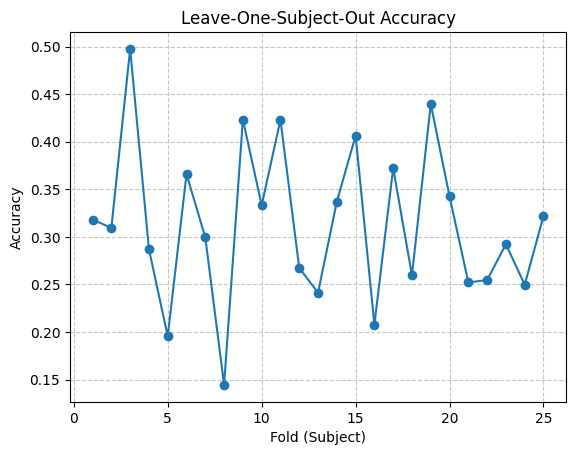

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_binary_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    clf = XGBClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42)
    clf.fit(tsfel_x_train, y_train)

    y_prob = clf.predict_proba(test_features)[:, 1] 
    threshold = 0.7
    y_pred = (y_prob >= threshold).astype(int) 

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted')
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)


    tn, fp, fn, tp = confusion_matrix(test_labels, y_pred).ravel()
    specificity = tn / (tn+fp)
    print(f"Specificity: {specificity}")

    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)


    print("-------------------------")
    
    # if i in [0, 1, 15, 24]:
    #     plotter(test_results)
    # load_metrics(test_results)

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.18983957219251338
Precision: 0.776156546446941
Recall: 0.18983957219251338
Confusion Matrix:
[[121   0   0]
 [134  21   0]
 [456  16   0]]
Specificities per class: [0.05901116427432217, 0.9730185497470489, 1.0]
Average Specificity: 0.6773432380071237
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.20861678004535147
Precision: 0.7953995380575769
Recall: 0.20861678004535147
Confusion Matrix:
[[168   0   0]
 [174  16   0]
 [519   5   0]]
Specificities per class: [0.029411764705882353, 0.9927745664739884, 1.0]
Average Specificity: 0.6740621103932902
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3765133171912833
Precision: 0.7661924939467313
Recall: 0.3765133171912833
Confusion Matrix:
[[309   0   0]
 [123   2   0]
 [392   0   0]]
Specificities per class: [0.0038684719535783366, 1.0, 1.0]
Average Specificity: 0.6679561573178594
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.13242574257425743
Precision: 0.8103909880783997
Recall: 0.13242574257425743
Confusion Matrix:
[[ 92   0   0]
 [177  15   0]
 [515   9   0]]
Specificities per class: [0.0335195530726257, 0.9853896103896104, 1.0]
Average Specificity: 0.6729697211540787
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.11070110701107011
Precision: 0.7992657199299266
Recall: 0.11070110701107011
Confusion Matrix:
[[ 83   1   0]
 [125   7   0]
 [584  13   0]]
Specificities per class: [0.027434842249657063, 0.9794419970631424, 1.0]
Average Specificity: 0.6689589464375998
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3474240422721268
Precision: 0.7303274791630483
Recall: 0.3474240422721268
Confusion Matrix:
[[263   0   0]
 [ 33   0   0]
 [457   4   0]]
Specificities per class: [0.008097165991902834, 0.994475138121547, 1.0]
Average Specificity: 0.6675241013711499
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.20864864864864865
Precision: 0.7770189218662501
Recall: 0.20864864864864865
Confusion Matrix:
[[190   0   0]
 [ 86   3   0]
 [641   5   0]]
Specificities per class: [0.010884353741496598, 0.9940191387559809, 1.0]
Average Specificity: 0.6683011641658259
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.09151047409040794
Precision: 0.8678338254046947
Recall: 0.09151047409040794
Confusion Matrix:
[[ 74   0   0]
 [160   9   0]
 [660   4   0]]
Specificities per class: [0.015606242496998799, 0.994579945799458, 1.0]
Average Specificity: 0.6700620627654855
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.39555555555555555
Precision: 0.7609086419753086
Recall: 0.39555555555555555
Confusion Matrix:
[[356   0   0]
 [ 42   0   0]
 [502   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.15856481481481483
Precision: 0.7771235994397758
Recall: 0.15856481481481483
Confusion Matrix:
[[129   0   0]
 [186   8   0]
 [535   6   0]]
Specificities per class: [0.01904761904761905, 0.991044776119403, 1.0]
Average Specificity: 0.6700307983890074
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3933415536374846
Precision: 0.7622858745402752
Recall: 0.3933415536374846
Confusion Matrix:
[[317   0   0]
 [ 65   2   0]
 [427   0   0]]
Specificities per class: [0.004048582995951417, 1.0, 1.0]
Average Specificity: 0.6680161943319837
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.2144702842377261
Precision: 0.8323254811115457
Recall: 0.2144702842377261
Confusion Matrix:
[[165   0   0]
 [ 81   1   0]
 [527   0   0]]
Specificities per class: [0.0016420361247947454, 1.0, 1.0]
Average Specificity: 0.6672140120415984
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.2292576419213974
Precision: 0.7999126318692794
Recall: 0.2292576419213974
Confusion Matrix:
[[208   0   0]
 [ 66   2   0]
 [639   1   0]]
Specificities per class: [0.00423728813559322, 0.9988207547169812, 1.0]
Average Specificity: 0.6676860142841914
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.13561470215462612
Precision: 0.8376830009570367
Recall: 0.13561470215462612
Confusion Matrix:
[[103   0   0]
 [189   4   0]
 [492   1   0]]
Specificities per class: [0.007288629737609329, 0.9983221476510067, 1.0]
Average Specificity: 0.6685369257962054
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.39416058394160586
Precision: 0.7368806169813523
Recall: 0.39416058394160586
Confusion Matrix:
[[324   4   0]
 [ 19   0   0]
 [470   5   0]]
Specificities per class: [0.010121457489878543, 0.9887920298879203, 1.0]
Average Specificity: 0.6663044957925996
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.11619718309859155
Precision: 0.8584602442239645
Recall: 0.11619718309859155
Confusion Matrix:
[[ 71   0   0]
 [158  28   0]
 [583  12   0]]
Specificities per class: [0.05121638924455826, 0.9819819819819819, 1.0]
Average Specificity: 0.6777327904088467
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.23670212765957446
Precision: 0.7594404957473305
Recall: 0.23670212765957446
Confusion Matrix:
[[163   6   0]
 [141  15   0]
 [426   1   0]]
Specificities per class: [0.0274442538593482, 0.988255033557047, 1.0]
Average Specificity: 0.6718997624721318
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.18619934282584885
Precision: 0.8112380717503195
Recall: 0.18619934282584885
Confusion Matrix:
[[165   1   0]
 [123   5   0]
 [618   1   0]]
Specificities per class: [0.008032128514056224, 0.9974522292993631, 1.0]
Average Specificity: 0.6684947859378064
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.4155019059720457
Precision: 0.70211336517256
Recall: 0.4155019059720457
Confusion Matrix:
[[327   0   0]
 [ 44   0   0]
 [412   4   0]]
Specificities per class: [0.008695652173913044, 0.9946164199192463, 1.0]
Average Specificity: 0.6677706906977198
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3310104529616725
Precision: 0.7273885857660599
Recall: 0.3310104529616725
Confusion Matrix:
[[282   0   0]
 [ 54   3   0]
 [508  14   0]]
Specificities per class: [0.02936096718480138, 0.9825870646766169, 1.0]
Average Specificity: 0.670649343953806
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.17699115044247787
Precision: 0.8581019224900823
Recall: 0.17699115044247787
Confusion Matrix:
[[155   0   0]
 [163   5   0]
 [581   0   0]]
Specificities per class: [0.006675567423230975, 1.0, 1.0]
Average Specificity: 0.6688918558077437
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.22925457102672292
Precision: 0.8233030873099239
Recall: 0.22925457102672292
Confusion Matrix:
[[163   0   0]
 [ 46   0   0]
 [502   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.14081145584725538
Precision: 0.7376926499737065
Recall: 0.14081145584725538
Confusion Matrix:
[[112   0   0]
 [240   6   0]
 [474   6   0]]
Specificities per class: [0.01652892561983471, 0.9898648648648649, 1.0]
Average Specificity: 0.6687979301615665
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1422172452407615
Precision: 0.8780084996031094
Recall: 0.1422172452407615
Confusion Matrix:
[[127   0   0]
 [139   0   0]
 [627   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 25:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.31761442441054094
Precision: 0.7169896104249786
Recall: 0.31761442441054094
Confusion Matrix:
[[225   3   0]
 [ 92   4   0]
 [396   1   0]]
Specificities per class: [0.010141987829614604, 0.9936, 1.0]
Average Specificity: 0.6679139959432048
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.2352, Std: 0.1022
Precision - Mean: 0.7881, Std: 0.0486
Recall - Mean: 0.2352, Std: 0.1022
Specificity - Mean: 0.6695, Std: 0.0030


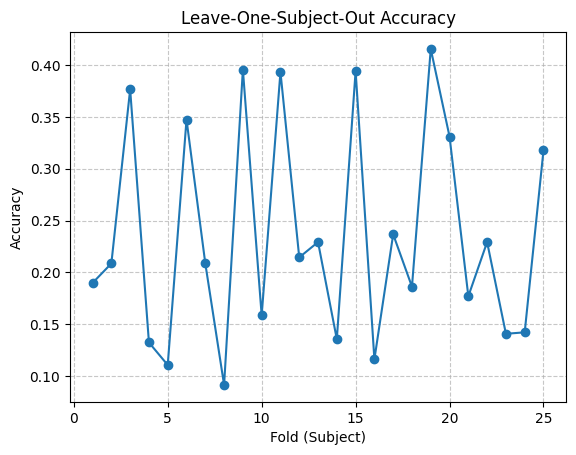

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_3_stage_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    from xgboost import XGBClassifier

    clf = XGBClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42)
    clf.fit(train_features, train_labels)

    threshold = 0.7  # Custom threshold

    y_prob = clf.predict_proba(test_features)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)

    conf_matrix = confusion_matrix(test_labels, y_pred)
    specificities = []

    for i in range(conf_matrix.shape[0]):  # Iterate over each class
        tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)

    print(f"Specificities per class: {specificities}")
    print(f"Average Specificity: {np.mean(specificities)}") 


    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": np.mean(specificities),
    }

    fold_results.append(fold_metrics)


    print("-------------------------")

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [115]:
# 3 stage

Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.16176470588235295
Precision: 0.8644031141868511
Recall: 0.16176470588235295
Confusion Matrix:
[[121   0   0]
 [155   0   0]
 [472   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.19047619047619047
Precision: 0.8458049886621315
Recall: 0.19047619047619047
Confusion Matrix:
[[168   0   0]
 [190   0   0]
 [524   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.37409200968523004
Precision: 0.7658528220251042
Recall: 0.37409200968523004
Confusion Matrix:
[[309   0   0]
 [125   0   0]
 [392   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.11386138613861387
Precision: 0.8991030291147927
Recall: 0.11386138613861387
Confusion Matrix:
[[ 92   0   0]
 [192   0   0]
 [524   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.1033210332103321
Precision: 0.9073542026933185
Recall: 0.1033210332103321
Confusion Matrix:
[[ 84   0   0]
 [132   0   0]
 [597   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.3474240422721268
Precision: 0.7732794228765778
Recall: 0.3474240422721268
Confusion Matrix:
[[263   0   0]
 [ 33   0   0]
 [461   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.20540540540540542
Precision: 0.8367859751643536
Recall: 0.20540540540540542
Confusion Matrix:
[[190   0   0]
 [ 89   0   0]
 [646   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.08158765159867695
Precision: 0.9250688932947101
Recall: 0.08158765159867695
Confusion Matrix:
[[ 74   0   0]
 [169   0   0]
 [664   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.39555555555555555
Precision: 0.7609086419753086
Recall: 0.39555555555555555
Confusion Matrix:
[[356   0   0]
 [ 42   0   0]
 [502   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.14930555555555555
Precision: 0.8729865933641975
Recall: 0.14930555555555555
Confusion Matrix:
[[129   0   0]
 [194   0   0]
 [541   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.3908754623921085
Precision: 0.7619081647081362
Recall: 0.3908754623921085
Confusion Matrix:
[[317   0   0]
 [ 67   0   0]
 [427   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.2131782945736434
Precision: 0.8322666907036836
Recall: 0.2131782945736434
Confusion Matrix:
[[165   0   0]
 [ 82   0   0]
 [527   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.22707423580786026
Precision: 0.8244884727598635
Recall: 0.22707423580786026
Confusion Matrix:
[[208   0   0]
 [ 68   0   0]
 [640   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.13054499366286437
Precision: 0.8864970017075728
Recall: 0.13054499366286437
Confusion Matrix:
[[103   0   0]
 [193   0   0]
 [493   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.39902676399026765
Precision: 0.7601955943902771
Recall: 0.39902676399026765
Confusion Matrix:
[[328   0   0]
 [ 19   0   0]
 [475   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.08333333333333333
Precision: 0.923611111111111
Recall: 0.08333333333333333
Confusion Matrix:
[[ 71   0   0]
 [186   0   0]
 [595   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.2247340425531915
Precision: 0.8257713473291082
Recall: 0.2247340425531915
Confusion Matrix:
[[169   0   0]
 [156   0   0]
 [427   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.18181818181818182
Precision: 0.8512396694214877
Recall: 0.18181818181818182
Confusion Matrix:
[[166   0   0]
 [128   0   0]
 [619   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.4155019059720457
Precision: 0.7571399278943569
Recall: 0.4155019059720457
Confusion Matrix:
[[327   0   0]
 [ 44   0   0]
 [416   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.32752613240418116
Precision: 0.77974723500346
Recall: 0.32752613240418116
Confusion Matrix:
[[282   0   0]
 [ 57   0   0]
 [522   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.17146017699115043
Precision: 0.8579384153026862
Recall: 0.17146017699115043
Confusion Matrix:
[[155   0   0]
 [168   0   0]
 [581   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.22925457102672292
Precision: 0.8233030873099239
Recall: 0.22925457102672292
Confusion Matrix:
[[163   0   0]
 [ 46   0   0]
 [502   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.13365155131264916
Precision: 0.8842111858556285
Recall: 0.13365155131264916
Confusion Matrix:
[[112   0   0]
 [246   0   0]
 [480   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.1422172452407615
Precision: 0.8780084996031094
Recall: 0.1422172452407615
Confusion Matrix:
[[127   0   0]
 [139   0   0]
 [627   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 25:
Accuracy: 0.31622746185852985
Precision: 0.783772345774958
Recall: 0.31622746185852985
Confusion Matrix:
[[228   0   0]
 [ 96   0   0]
 [397   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.2284, Std: 0.1072
Precision - Mean: 0.8353, Std: 0.0539
Recall - Mean: 0.2284, Std: 0.1072
Specificity - Mean: 0.6667, Std: 0.0000


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


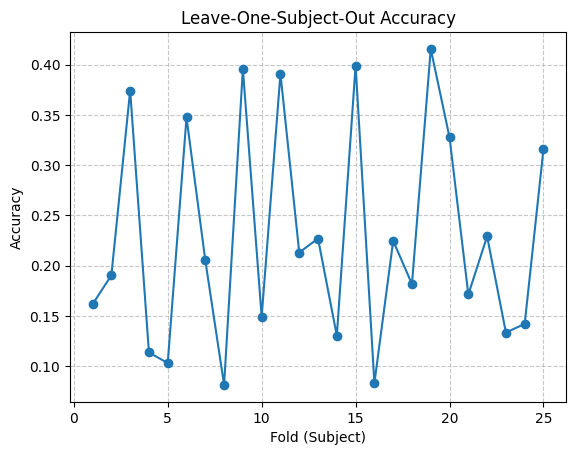

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_3_stage_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(train_features, train_labels)

    threshold = 0.7  # Custom threshold

    y_prob = clf.predict_proba(test_features)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)

    conf_matrix = confusion_matrix(test_labels, y_pred)
    specificities = []

    for i in range(conf_matrix.shape[0]):  # Iterate over each class
        tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)

    print(f"Specificities per class: {specificities}")
    print(f"Average Specificity: {np.mean(specificities)}") 


    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": np.mean(specificities),
    }

    fold_results.append(fold_metrics)


    print("-------------------------")

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# 4 stage

Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.196524064171123
Precision: 0.7840752755602713
Recall: 0.196524064171123
Confusion Matrix:
[[121   0   0   0]
 [129  26   0   0]
 [378   7   0   0]
 [ 77  10   0   0]]
Specificities per class: [0.0685805422647528, 0.9713322091062394, 1.0, 1.0]
Average Specificity: 0.7599781878427481
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.2108843537414966
Precision: 0.8251048292480179
Recall: 0.2108843537414966
Confusion Matrix:
[[168   0   0   0]
 [172  18   0   0]
 [358   2   0   0]
 [164   0   0   0]]
Specificities per class: [0.028011204481792718, 0.9971098265895953, 1.0, 1.0]
Average Specificity: 0.756280257767847
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:31:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.37409200968523004
Precision: 0.7658528220251042
Recall: 0.37409200968523004
Confusion Matrix:
[[309   0   0   0]
 [125   0   0   0]
 [340   0   0   0]
 [ 52   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:31:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.13366336633663367
Precision: 0.8346594201404873
Recall: 0.13366336633663367
Confusion Matrix:
[[ 92   0   0   0]
 [176  16   0   0]
 [272   4   0   0]
 [246   2   0   0]]
Specificities per class: [0.030726256983240222, 0.9902597402597403, 1.0, 1.0]
Average Specificity: 0.7552464993107451
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.11931119311193111
Precision: 0.8297593046996461
Recall: 0.11931119311193111
Confusion Matrix:
[[ 84   0   0   0]
 [119  13   0   0]
 [458  12   0   0]
 [127   0   0   0]]
Specificities per class: [0.03429355281207133, 0.9823788546255506, 1.0, 1.0]
Average Specificity: 0.7541681018594055
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3474240422721268
Precision: 0.7336383837255195
Recall: 0.3474240422721268
Confusion Matrix:
[[263   0   0   0]
 [ 33   0   0   0]
 [365  13   0   0]
 [ 72  11   0   0]]
Specificities per class: [0.048582995951417005, 0.9668508287292817, 1.0, 1.0]
Average Specificity: 0.7538584561701747
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.21297297297297296
Precision: 0.7759231231231231
Recall: 0.21297297297297296
Confusion Matrix:
[[188   2   0   0]
 [ 80   9   0   0]
 [495  10   0   0]
 [137   4   0   0]]
Specificities per class: [0.031292517006802724, 0.9808612440191388, 1.0, 1.0]
Average Specificity: 0.7530384402564854
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.09151047409040794
Precision: 0.8506494084376128
Recall: 0.09151047409040794
Confusion Matrix:
[[ 74   0   0   0]
 [160   9   0   0]
 [579   6   0   0]
 [ 79   0   0   0]]
Specificities per class: [0.01800720288115246, 0.991869918699187, 1.0, 1.0]
Average Specificity: 0.7524692803950849
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.39555555555555555
Precision: 0.7609086419753086
Recall: 0.39555555555555555
Confusion Matrix:
[[356   0   0   0]
 [ 42   0   0   0]
 [384   0   0   0]
 [118   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1597222222222222
Precision: 0.8042388123909864
Recall: 0.1597222222222222
Confusion Matrix:
[[129   0   0   0]
 [185   9   0   0]
 [392   3   0   0]
 [145   1   0   0]]
Specificities per class: [0.017687074829931974, 0.9940298507462687, 1.0, 1.0]
Average Specificity: 0.7529292313940501
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3933415536374846
Precision: 0.7622858745402752
Recall: 0.3933415536374846
Confusion Matrix:
[[317   0   0   0]
 [ 65   2   0   0]
 [316   0   0   0]
 [111   0   0   0]]
Specificities per class: [0.004048582995951417, 1.0, 1.0, 1.0]
Average Specificity: 0.7510121457489878
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.2157622739018088
Precision: 0.8323844238261637
Recall: 0.2157622739018088
Confusion Matrix:
[[165   0   0]
 [ 80   2   0]
 [527   0   0]]
Specificities per class: [0.003284072249589491, 1.0, 1.0]
Average Specificity: 0.6677613574165298
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.22707423580786026
Precision: 0.8244884727598635
Recall: 0.22707423580786026
Confusion Matrix:
[[208   0   0   0]
 [ 68   0   0   0]
 [494   0   0   0]
 [146   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1444866920152091
Precision: 0.8215970236750147
Recall: 0.1444866920152091
Confusion Matrix:
[[103   0   0   0]
 [182  11   0   0]
 [424   4   0   0]
 [ 65   0   0   0]]
Specificities per class: [0.021865889212827987, 0.9932885906040269, 1.0, 1.0]
Average Specificity: 0.7537886199542136
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.39659367396593675
Precision: 0.7372739850197987
Recall: 0.39659367396593675
Confusion Matrix:
[[326   2   0   0]
 [ 19   0   0   0]
 [334   4   0   0]
 [137   0   0   0]]
Specificities per class: [0.008097165991902834, 0.9925280199252802, 1.0, 1.0]
Average Specificity: 0.7501562964792958
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1056338028169014
Precision: 0.8275865823446359
Recall: 0.1056338028169014
Confusion Matrix:
[[ 71   0   0   0]
 [167  19   0   0]
 [390   9   0   0]
 [190   6   0   0]]
Specificities per class: [0.04353393085787452, 0.9774774774774775, 1.0, 1.0]
Average Specificity: 0.755252852083838
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.22606382978723405
Precision: 0.7149743940129242
Recall: 0.22606382978723405
Confusion Matrix:
[[162   7   0   0]
 [148   8   0   0]
 [361   2   0   0]
 [ 64   0   0   0]]
Specificities per class: [0.017152658662092625, 0.9848993288590604, 1.0, 1.0]
Average Specificity: 0.7505129968802883
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.18838992332968238
Precision: 0.7762263974312167
Recall: 0.18838992332968238
Confusion Matrix:
[[166   0   0   0]
 [122   6   0   0]
 [485   7   0   0]
 [127   0   0   0]]
Specificities per class: [0.01740294511378849, 0.9910828025477707, 1.0, 1.0]
Average Specificity: 0.7521214369153898
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.4155019059720457
Precision: 0.7014510606516193
Recall: 0.4155019059720457
Confusion Matrix:
[[327   0   0   0]
 [ 44   0   0   0]
 [284   1   0   0]
 [131   0   0   0]]
Specificities per class: [0.002173913043478261, 0.9986541049798116, 1.0, 1.0]
Average Specificity: 0.7502070045058225
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3321718931475029
Precision: 0.7390068754774637
Recall: 0.3321718931475029
Confusion Matrix:
[[282   0   0   0]
 [ 53   4   0   0]
 [446   7   0   0]
 [ 69   0   0   0]]
Specificities per class: [0.018998272884283247, 0.9912935323383084, 1.0, 1.0]
Average Specificity: 0.7525729513056479
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.17256637168141592
Precision: 0.8579709718832995
Recall: 0.17256637168141592
Confusion Matrix:
[[155   0   0   0]
 [167   1   0   0]
 [444   0   0   0]
 [137   0   0   0]]
Specificities per class: [0.0013351134846461949, 1.0, 1.0, 1.0]
Average Specificity: 0.7503337783711616
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.22925457102672292
Precision: 0.8233030873099239
Recall: 0.22925457102672292
Confusion Matrix:
[[163   0   0   0]
 [ 46   0   0   0]
 [493   0   0   0]
 [  9   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.13842482100238662
Precision: 0.7864879750321278
Recall: 0.13842482100238662
Confusion Matrix:
[[112   0   0   0]
 [242   4   0   0]
 [339   2   0   0]
 [139   0   0   0]]
Specificities per class: [0.008264462809917356, 0.9966216216216216, 1.0, 1.0]
Average Specificity: 0.7512215211078848
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1422172452407615
Precision: 0.8780084996031094
Recall: 0.1422172452407615
Confusion Matrix:
[[127   0   0   0]
 [139   0   0   0]
 [592   0   0   0]
 [ 35   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 25:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.31622746185852985
Precision: 0.6949613493302813
Recall: 0.31622746185852985
Confusion Matrix:
[[226   2   0   0]
 [ 94   2   0   0]
 [343   2   0   0]
 [ 52   0   0   0]]
Specificities per class: [0.008113590263691683, 0.9936, 1.0, 1.0]
Average Specificity: 0.7504283975659229
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.2354, Std: 0.1019
Precision - Mean: 0.7897, Std: 0.0495
Recall - Mean: 0.2354, Std: 0.1019
Specificity - Mean: 0.7489, Std: 0.0167


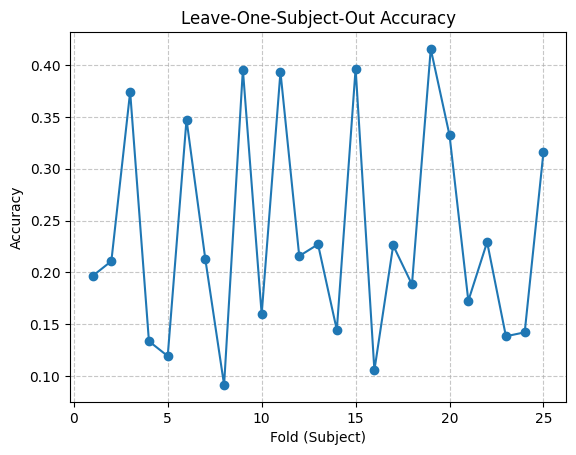

In [117]:



from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_4_stage_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]
    
    from xgboost import XGBClassifier

    clf = XGBClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42)
    clf.fit(train_features, train_labels)

    threshold = 0.7  # Custom threshold

    y_prob = clf.predict_proba(test_features)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)

    conf_matrix = confusion_matrix(test_labels, y_pred)
    specificities = []

    for i in range(conf_matrix.shape[0]):  # Iterate over each class
        tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)

    print(f"Specificities per class: {specificities}")
    print(f"Average Specificity: {np.mean(specificities)}") 


    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": np.mean(specificities),
    }

    fold_results.append(fold_metrics)


    print("-------------------------")

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.16176470588235295
Precision: 0.8644031141868511
Recall: 0.16176470588235295
Confusion Matrix:
[[121   0   0   0]
 [155   0   0   0]
 [385   0   0   0]
 [ 87   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.19047619047619047
Precision: 0.8458049886621315
Recall: 0.19047619047619047
Confusion Matrix:
[[168   0   0   0]
 [190   0   0   0]
 [360   0   0   0]
 [164   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.37409200968523004
Precision: 0.7658528220251042
Recall: 0.37409200968523004
Confusion Matrix:
[[309   0   0   0]
 [125   0   0   0]
 [340   0   0   0]
 [ 52   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.11386138613861387
Precision: 0.8991030291147927
Recall: 0.11386138613861387
Confusion Matrix:
[[ 92   0   0   0]
 [192   0   0   0]
 [276   0   0   0]
 [248   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.1033210332103321
Precision: 0.9073542026933185
Recall: 0.1033210332103321
Confusion Matrix:
[[ 84   0   0   0]
 [132   0   0   0]
 [470   0   0   0]
 [127   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.3474240422721268
Precision: 0.7732794228765778
Recall: 0.3474240422721268
Confusion Matrix:
[[263   0   0   0]
 [ 33   0   0   0]
 [378   0   0   0]
 [ 83   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.20540540540540542
Precision: 0.8367859751643536
Recall: 0.20540540540540542
Confusion Matrix:
[[190   0   0   0]
 [ 89   0   0   0]
 [505   0   0   0]
 [141   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.08158765159867695
Precision: 0.9250688932947101
Recall: 0.08158765159867695
Confusion Matrix:
[[ 74   0   0   0]
 [169   0   0   0]
 [585   0   0   0]
 [ 79   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.39555555555555555
Precision: 0.7609086419753086
Recall: 0.39555555555555555
Confusion Matrix:
[[356   0   0   0]
 [ 42   0   0   0]
 [384   0   0   0]
 [118   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.14930555555555555
Precision: 0.8729865933641975
Recall: 0.14930555555555555
Confusion Matrix:
[[129   0   0   0]
 [194   0   0   0]
 [395   0   0   0]
 [146   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.3908754623921085
Precision: 0.7619081647081362
Recall: 0.3908754623921085
Confusion Matrix:
[[317   0   0   0]
 [ 67   0   0   0]
 [316   0   0   0]
 [111   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.2131782945736434
Precision: 0.8322666907036836
Recall: 0.2131782945736434
Confusion Matrix:
[[165   0   0]
 [ 82   0   0]
 [527   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.22707423580786026
Precision: 0.8244884727598635
Recall: 0.22707423580786026
Confusion Matrix:
[[208   0   0   0]
 [ 68   0   0   0]
 [494   0   0   0]
 [146   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.13054499366286437
Precision: 0.8864970017075728
Recall: 0.13054499366286437
Confusion Matrix:
[[103   0   0   0]
 [193   0   0   0]
 [428   0   0   0]
 [ 65   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.39902676399026765
Precision: 0.7601955943902771
Recall: 0.39902676399026765
Confusion Matrix:
[[328   0   0   0]
 [ 19   0   0   0]
 [338   0   0   0]
 [137   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.08333333333333333
Precision: 0.923611111111111
Recall: 0.08333333333333333
Confusion Matrix:
[[ 71   0   0   0]
 [186   0   0   0]
 [399   0   0   0]
 [196   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.2247340425531915
Precision: 0.8257713473291082
Recall: 0.2247340425531915
Confusion Matrix:
[[169   0   0   0]
 [156   0   0   0]
 [363   0   0   0]
 [ 64   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.18181818181818182
Precision: 0.8512396694214877
Recall: 0.18181818181818182
Confusion Matrix:
[[166   0   0   0]
 [128   0   0   0]
 [492   0   0   0]
 [127   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.4155019059720457
Precision: 0.7571399278943569
Recall: 0.4155019059720457
Confusion Matrix:
[[327   0   0   0]
 [ 44   0   0   0]
 [285   0   0   0]
 [131   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.32752613240418116
Precision: 0.77974723500346
Recall: 0.32752613240418116
Confusion Matrix:
[[282   0   0   0]
 [ 57   0   0   0]
 [453   0   0   0]
 [ 69   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.17146017699115043
Precision: 0.8579384153026862
Recall: 0.17146017699115043
Confusion Matrix:
[[155   0   0   0]
 [168   0   0   0]
 [444   0   0   0]
 [137   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.22925457102672292
Precision: 0.8233030873099239
Recall: 0.22925457102672292
Confusion Matrix:
[[163   0   0   0]
 [ 46   0   0   0]
 [493   0   0   0]
 [  9   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.13365155131264916
Precision: 0.8842111858556285
Recall: 0.13365155131264916
Confusion Matrix:
[[112   0   0   0]
 [246   0   0   0]
 [341   0   0   0]
 [139   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.1422172452407615
Precision: 0.8780084996031094
Recall: 0.1422172452407615
Confusion Matrix:
[[127   0   0   0]
 [139   0   0   0]
 [592   0   0   0]
 [ 35   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 25:
Accuracy: 0.31622746185852985
Precision: 0.783772345774958
Recall: 0.31622746185852985
Confusion Matrix:
[[228   0   0   0]
 [ 96   0   0   0]
 [345   0   0   0]
 [ 52   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.2284, Std: 0.1072
Precision - Mean: 0.8353, Std: 0.0539
Recall - Mean: 0.2284, Std: 0.1072
Specificity - Mean: 0.7467, Std: 0.0163


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


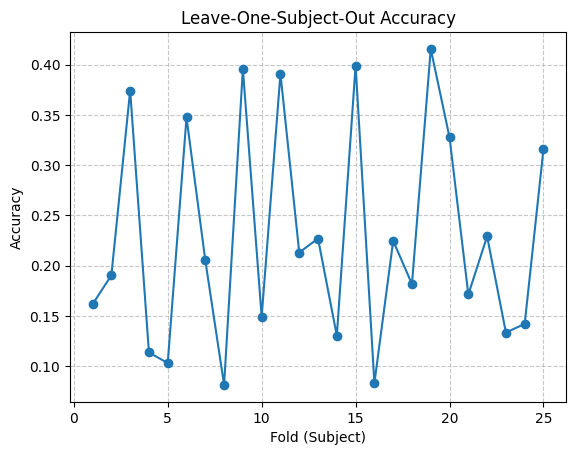

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_4_stage_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(train_features, train_labels)

    threshold = 0.7  # Custom threshold

    y_prob = clf.predict_proba(test_features)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)

    conf_matrix = confusion_matrix(test_labels, y_pred)
    specificities = []

    for i in range(conf_matrix.shape[0]):  # Iterate over each class
        tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)

    print(f"Specificities per class: {specificities}")
    print(f"Average Specificity: {np.mean(specificities)}") 


    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": np.mean(specificities),
    }

    fold_results.append(fold_metrics)


    print("-------------------------")

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# 6 stage

Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.16176470588235295
Precision: 0.8644031141868511
Recall: 0.16176470588235295
Confusion Matrix:
[[121   0   0   0   0   0]
 [155   0   0   0   0   0]
 [213   0   0   0   0   0]
 [172   0   0   0   0   0]
 [ 29   0   0   0   0   0]
 [ 58   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.19047619047619047
Precision: 0.8458049886621315
Recall: 0.19047619047619047
Confusion Matrix:
[[168   0   0   0   0   0]
 [190   0   0   0   0   0]
 [106   0   0   0   0   0]
 [254   0   0   0   0   0]
 [ 51   0   0   0   0   0]
 [113   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.37409200968523004
Precision: 0.7658528220251042
Recall: 0.37409200968523004
Confusion Matrix:
[[309   0   0   0   0   0]
 [125   0   0   0   0   0]
 [ 89   0   0   0   0   0]
 [251   0   0   0   0   0]
 [  8   0   0   0   0   0]
 [ 44   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.11386138613861387
Precision: 0.8991030291147927
Recall: 0.11386138613861387
Confusion Matrix:
[[ 92   0   0   0   0   0]
 [192   0   0   0   0   0]
 [181   0   0   0   0   0]
 [ 95   0   0   0   0   0]
 [ 49   0   0   0   0   0]
 [199   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.1033210332103321
Precision: 0.9073542026933185
Recall: 0.1033210332103321
Confusion Matrix:
[[ 84   0   0   0   0   0]
 [132   0   0   0   0   0]
 [ 56   0   0   0   0   0]
 [414   0   0   0   0   0]
 [ 39   0   0   0   0   0]
 [ 88   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.3474240422721268
Precision: 0.7732794228765778
Recall: 0.3474240422721268
Confusion Matrix:
[[263   0   0   0   0   0]
 [ 33   0   0   0   0   0]
 [ 76   0   0   0   0   0]
 [302   0   0   0   0   0]
 [ 46   0   0   0   0   0]
 [ 37   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.20540540540540542
Precision: 0.8367859751643536
Recall: 0.20540540540540542
Confusion Matrix:
[[190   0   0   0   0   0]
 [ 89   0   0   0   0   0]
 [261   0   0   0   0   0]
 [244   0   0   0   0   0]
 [ 25   0   0   0   0   0]
 [116   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.08158765159867695
Precision: 0.9250688932947101
Recall: 0.08158765159867695
Confusion Matrix:
[[ 74   0   0   0   0   0]
 [169   0   0   0   0   0]
 [120   0   0   0   0   0]
 [465   0   0   0   0   0]
 [ 32   0   0   0   0   0]
 [ 47   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.39555555555555555
Precision: 0.7609086419753086
Recall: 0.39555555555555555
Confusion Matrix:
[[356   0   0   0   0   0]
 [ 42   0   0   0   0   0]
 [ 89   0   0   0   0   0]
 [295   0   0   0   0   0]
 [ 52   0   0   0   0   0]
 [ 66   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.14930555555555555
Precision: 0.8729865933641975
Recall: 0.14930555555555555
Confusion Matrix:
[[129   0   0   0   0   0]
 [194   0   0   0   0   0]
 [ 58   0   0   0   0   0]
 [337   0   0   0   0   0]
 [ 31   0   0   0   0   0]
 [115   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.3908754623921085
Precision: 0.7619081647081362
Recall: 0.3908754623921085
Confusion Matrix:
[[317   0   0   0   0   0]
 [ 67   0   0   0   0   0]
 [143   0   0   0   0   0]
 [173   0   0   0   0   0]
 [ 16   0   0   0   0   0]
 [ 95   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.2131782945736434
Precision: 0.8322666907036836
Recall: 0.2131782945736434
Confusion Matrix:
[[165   0   0   0]
 [ 82   0   0   0]
 [260   0   0   0]
 [267   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.22707423580786026
Precision: 0.8244884727598634
Recall: 0.22707423580786026
Confusion Matrix:
[[208   0   0   0   0   0]
 [ 68   0   0   0   0   0]
 [200   0   0   0   0   0]
 [294   0   0   0   0   0]
 [ 16   0   0   0   0   0]
 [130   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.13054499366286437
Precision: 0.8864970017075728
Recall: 0.13054499366286437
Confusion Matrix:
[[103   0   0   0   0   0]
 [193   0   0   0   0   0]
 [ 36   0   0   0   0   0]
 [392   0   0   0   0   0]
 [ 32   0   0   0   0   0]
 [ 33   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.39902676399026765
Precision: 0.7601955943902771
Recall: 0.39902676399026765
Confusion Matrix:
[[328   0   0   0   0   0]
 [ 19   0   0   0   0   0]
 [ 58   0   0   0   0   0]
 [280   0   0   0   0   0]
 [  4   0   0   0   0   0]
 [133   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.08333333333333333
Precision: 0.923611111111111
Recall: 0.08333333333333333
Confusion Matrix:
[[ 71   0   0   0   0   0]
 [186   0   0   0   0   0]
 [ 47   0   0   0   0   0]
 [352   0   0   0   0   0]
 [ 43   0   0   0   0   0]
 [153   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.2247340425531915
Precision: 0.8257713473291082
Recall: 0.2247340425531915
Confusion Matrix:
[[169   0   0   0   0   0]
 [156   0   0   0   0   0]
 [208   0   0   0   0   0]
 [155   0   0   0   0   0]
 [ 20   0   0   0   0   0]
 [ 44   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.18181818181818182
Precision: 0.8512396694214877
Recall: 0.18181818181818182
Confusion Matrix:
[[166   0   0   0   0   0]
 [128   0   0   0   0   0]
 [122   0   0   0   0   0]
 [370   0   0   0   0   0]
 [ 46   0   0   0   0   0]
 [ 81   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.4155019059720457
Precision: 0.7571399278943569
Recall: 0.4155019059720457
Confusion Matrix:
[[327   0   0   0   0   0]
 [ 44   0   0   0   0   0]
 [ 70   0   0   0   0   0]
 [215   0   0   0   0   0]
 [  6   0   0   0   0   0]
 [125   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.32752613240418116
Precision: 0.77974723500346
Recall: 0.32752613240418116
Confusion Matrix:
[[282   0   0   0   0   0]
 [ 57   0   0   0   0   0]
 [226   0   0   0   0   0]
 [227   0   0   0   0   0]
 [ 18   0   0   0   0   0]
 [ 51   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.17146017699115043
Precision: 0.8579384153026862
Recall: 0.17146017699115043
Confusion Matrix:
[[155   0   0   0   0   0]
 [168   0   0   0   0   0]
 [113   0   0   0   0   0]
 [331   0   0   0   0   0]
 [ 30   0   0   0   0   0]
 [107   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.22925457102672292
Precision: 0.8233030873099239
Recall: 0.22925457102672292
Confusion Matrix:
[[163   0   0   0   0]
 [ 46   0   0   0   0]
 [369   0   0   0   0]
 [124   0   0   0   0]
 [  9   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.13365155131264916
Precision: 0.8842111858556285
Recall: 0.13365155131264916
Confusion Matrix:
[[112   0   0   0   0   0]
 [246   0   0   0   0   0]
 [100   0   0   0   0   0]
 [241   0   0   0   0   0]
 [ 33   0   0   0   0   0]
 [106   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.1422172452407615
Precision: 0.8780084996031094
Recall: 0.1422172452407615
Confusion Matrix:
[[127   0   0   0   0   0]
 [139   0   0   0   0   0]
 [ 62   0   0   0   0   0]
 [530   0   0   0   0   0]
 [ 15   0   0   0   0   0]
 [ 20   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 25:
Accuracy: 0.31622746185852985
Precision: 0.783772345774958
Recall: 0.31622746185852985
Confusion Matrix:
[[228   0   0   0   0   0]
 [ 96   0   0   0   0   0]
 [140   0   0   0   0   0]
 [205   0   0   0   0   0]
 [ 23   0   0   0   0   0]
 [ 29   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.2284, Std: 0.1072
Precision - Mean: 0.8353, Std: 0.0539
Recall - Mean: 0.2284, Std: 0.1072
Specificity - Mean: 0.8287, Std: 0.0173


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


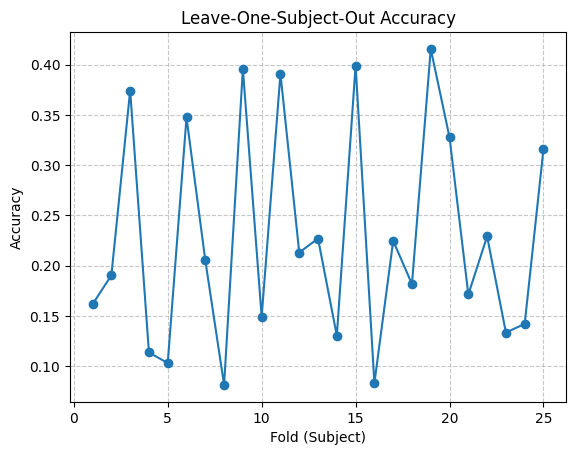

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(train_features, train_labels)

    threshold = 0.7  # Custom threshold

    y_prob = clf.predict_proba(test_features)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)

    conf_matrix = confusion_matrix(test_labels, y_pred)
    specificities = []

    for i in range(conf_matrix.shape[0]):  # Iterate over each class
        tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)

    print(f"Specificities per class: {specificities}")
    print(f"Average Specificity: {np.mean(specificities)}") 


    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": np.mean(specificities),
    }

    fold_results.append(fold_metrics)


    print("-------------------------")

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.19385026737967914
Precision: 0.780000448292421
Recall: 0.19385026737967914
Confusion Matrix:
[[121   0   0   0   0   0]
 [131  24   0   0   0   0]
 [208   5   0   0   0   0]
 [169   3   0   0   0   0]
 [ 26   3   0   0   0   0]
 [ 52   6   0   0   0   0]]
Specificities per class: [0.06539074960127592, 0.9713322091062394, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8394538264512525
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.21201814058956917
Precision: 0.7951626858444661
Recall: 0.21201814058956917
Confusion Matrix:
[[168   0   0   0   0   0]
 [171  19   0   0   0   0]
 [105   1   0   0   0   0]
 [249   5   0   0   0   0]
 [ 51   0   0   0   0   0]
 [113   0   0   0   0   0]]
Specificities per class: [0.0350140056022409, 0.9913294797687862, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8377239142285046
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.37409200968523004
Precision: 0.6146907329958178
Recall: 0.37409200968523004
Confusion Matrix:
[[309   0   0   0   0   0]
 [125   0   0   0   0   0]
 [ 88   1   0   0   0   0]
 [251   0   0   0   0   0]
 [  8   0   0   0   0   0]
 [ 44   0   0   0   0   0]]
Specificities per class: [0.0019342359767891683, 0.9985734664764622, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8334179504088753
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.13613861386138615
Precision: 0.8329823097252255
Recall: 0.13613861386138615
Confusion Matrix:
[[ 92   0   0   0   0   0]
 [174  18   0   0   0   0]
 [181   0   0   0   0   0]
 [ 91   4   0   0   0   0]
 [ 49   0   0   0   0   0]
 [196   3   0   0   0   0]]
Specificities per class: [0.034916201117318434, 0.9886363636363636, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8372587607922805
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.11193111931119311
Precision: 0.7907925150317493
Recall: 0.11193111931119311
Confusion Matrix:
[[ 84   0   0   0   0   0]
 [125   7   0   0   0   0]
 [ 55   1   0   0   0   0]
 [398  16   0   0   0   0]
 [ 38   1   0   0   0   0]
 [ 88   0   0   0   0   0]]
Specificities per class: [0.03429355281207133, 0.973568281938326, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8346436391250661
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3474240422721268
Precision: 0.7344945345275596
Recall: 0.3474240422721268
Confusion Matrix:
[[263   0   0   0   0   0]
 [ 33   0   0   0   0   0]
 [ 76   0   0   0   0   0]
 [287  15   0   0   0   0]
 [ 41   5   0   0   0   0]
 [ 28   9   0   0   0   0]]
Specificities per class: [0.058704453441295545, 0.9599447513812155, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8364415341370851
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.21081081081081082
Precision: 0.7610106286061342
Recall: 0.21081081081081082
Confusion Matrix:
[[188   2   0   0   0   0]
 [ 82   7   0   0   0   0]
 [252   9   0   0   0   0]
 [234  10   0   0   0   0]
 [ 21   4   0   0   0   0]
 [113   3   0   0   0   0]]
Specificities per class: [0.044897959183673466, 0.9665071770334929, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8352341893695278
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.08930540242557883
Precision: 0.8391678937619164
Recall: 0.08930540242557883
Confusion Matrix:
[[ 74   0   0   0   0   0]
 [162   7   0   0   0   0]
 [120   0   0   0   0   0]
 [459   6   0   0   0   0]
 [ 32   0   0   0   0   0]
 [ 47   0   0   0   0   0]]
Specificities per class: [0.015606242496998799, 0.991869918699187, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8345793601993643
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.39555555555555555
Precision: 0.7609086419753086
Recall: 0.39555555555555555
Confusion Matrix:
[[356   0   0   0   0   0]
 [ 42   0   0   0   0   0]
 [ 89   0   0   0   0   0]
 [295   0   0   0   0   0]
 [ 52   0   0   0   0   0]
 [ 66   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1597222222222222
Precision: 0.7931619592281357
Recall: 0.1597222222222222
Confusion Matrix:
[[129   0   0   0   0   0]
 [185   9   0   0   0   0]
 [ 57   1   0   0   0   0]
 [333   4   0   0   0   0]
 [ 31   0   0   0   0   0]
 [115   0   0   0   0   0]]
Specificities per class: [0.01904761904761905, 0.9925373134328358, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8352641554134091
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3921085080147966
Precision: 0.7620967864699882
Recall: 0.3921085080147966
Confusion Matrix:
[[317   0   0   0   0   0]
 [ 66   1   0   0   0   0]
 [143   0   0   0   0   0]
 [173   0   0   0   0   0]
 [ 16   0   0   0   0   0]
 [ 95   0   0   0   0   0]]
Specificities per class: [0.0020242914979757085, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8336707152496626
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.2131782945736434
Precision: 0.8322666907036836
Recall: 0.2131782945736434
Confusion Matrix:
[[165   0   0   0]
 [ 82   0   0   0]
 [260   0   0   0]
 [267   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.22707423580786026
Precision: 0.8244884727598634
Recall: 0.22707423580786026
Confusion Matrix:
[[208   0   0   0   0   0]
 [ 68   0   0   0   0   0]
 [200   0   0   0   0   0]
 [294   0   0   0   0   0]
 [ 16   0   0   0   0   0]
 [130   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.14195183776932827
Precision: 0.8622544258262276
Recall: 0.14195183776932827
Confusion Matrix:
[[103   0   0   0   0   0]
 [184   9   0   0   0   0]
 [ 36   0   0   0   0   0]
 [391   1   0   0   0   0]
 [ 32   0   0   0   0   0]
 [ 33   0   0   0   0   0]]
Specificities per class: [0.014577259475218658, 0.9983221476510067, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8354832345210376
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.39659367396593675
Precision: 0.7370788624931877
Recall: 0.39659367396593675
Confusion Matrix:
[[326   2   0   0   0   0]
 [ 19   0   0   0   0   0]
 [ 57   1   0   0   0   0]
 [278   2   0   0   0   0]
 [  4   0   0   0   0   0]
 [133   0   0   0   0   0]]
Specificities per class: [0.006072874493927126, 0.9937733499377335, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333077040719434
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.11384976525821597
Precision: 0.859023449267984
Recall: 0.11384976525821597
Confusion Matrix:
[[ 71   0   0   0   0   0]
 [160  26   0   0   0   0]
 [ 46   1   0   0   0   0]
 [347   5   0   0   0   0]
 [ 42   1   0   0   0   0]
 [149   4   0   0   0   0]]
Specificities per class: [0.04737516005121639, 0.9834834834834835, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8384764405891166
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.22739361702127658
Precision: 0.7211432546814307
Recall: 0.22739361702127658
Confusion Matrix:
[[162   7   0   0   0   0]
 [147   9   0   0   0   0]
 [207   1   0   0   0   0]
 [154   1   0   0   0   0]
 [ 20   0   0   0   0   0]
 [ 44   0   0   0   0   0]]
Specificities per class: [0.018867924528301886, 0.9848993288590604, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8339612088978937
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.18619934282584885
Precision: 0.7736814783941344
Recall: 0.18619934282584885
Confusion Matrix:
[[166   0   0   0   0   0]
 [124   4   0   0   0   0]
 [121   1   0   0   0   0]
 [366   4   0   0   0   0]
 [ 46   0   0   0   0   0]
 [ 81   0   0   0   0   0]]
Specificities per class: [0.012048192771084338, 0.9936305732484076, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.834279794336582
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.4142312579415502
Precision: 0.701362056893914
Recall: 0.4142312579415502
Confusion Matrix:
[[326   1   0   0   0   0]
 [ 44   0   0   0   0   0]
 [ 70   0   0   0   0   0]
 [214   1   0   0   0   0]
 [  6   0   0   0   0   0]
 [124   1   0   0   0   0]]
Specificities per class: [0.004347826086956522, 0.9959623149394348, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333850235043986
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.3310104529616725
Precision: 0.7354892996309507
Recall: 0.3310104529616725
Confusion Matrix:
[[280   2   0   0   0   0]
 [ 52   5   0   0   0   0]
 [221   5   0   0   0   0]
 [223   4   0   0   0   0]
 [ 18   0   0   0   0   0]
 [ 51   0   0   0   0   0]]
Specificities per class: [0.024179620034542316, 0.986318407960199, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8350830046657901
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1747787610619469
Precision: 0.8580363018475047
Recall: 0.1747787610619469
Confusion Matrix:
[[155   0   0   0   0   0]
 [165   3   0   0   0   0]
 [113   0   0   0   0   0]
 [331   0   0   0   0   0]
 [ 30   0   0   0   0   0]
 [107   0   0   0   0   0]]
Specificities per class: [0.004005340453938585, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8340008900756564
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:38:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.22925457102672292
Precision: 0.7586795031794139
Recall: 0.22925457102672292
Confusion Matrix:
[[163   0   0   0   0]
 [ 46   0   0   0   0]
 [369   0   0   0   0]
 [124   0   0   0   0]
 [  8   1   0   0   0]]
Specificities per class: [0.0018248175182481751, 0.9984962406015038, 1.0, 1.0, 1.0]
Average Specificity: 0.8000642116239505
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:38:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.15035799522673032
Precision: 0.8355142907037661
Recall: 0.15035799522673032
Confusion Matrix:
[[111   1   0   0   0   0]
 [231  15   0   0   0   0]
 [100   0   0   0   0   0]
 [240   1   0   0   0   0]
 [ 33   0   0   0   0   0]
 [105   1   0   0   0   0]]
Specificities per class: [0.023415977961432508, 0.9949324324324325, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8363914017323109
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:38:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1422172452407615
Precision: 0.8780084996031094
Recall: 0.1422172452407615
Confusion Matrix:
[[127   0   0   0   0   0]
 [139   0   0   0   0   0]
 [ 62   0   0   0   0   0]
 [530   0   0   0   0   0]
 [ 15   0   0   0   0   0]
 [ 20   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 25:


d:\clg_stuff\ML project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:38:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.32038834951456313
Precision: 0.7510431235093054
Recall: 0.32038834951456313
Confusion Matrix:
[[228   0   0   0   0   0]
 [ 93   3   0   0   0   0]
 [139   1   0   0   0   0]
 [205   0   0   0   0   0]
 [ 23   0   0   0   0   0]
 [ 29   0   0   0   0   0]]
Specificities per class: [0.008113590263691683, 0.9984, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8344189317106153
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.2357, Std: 0.1015
Precision - Mean: 0.7837, Std: 0.0594
Recall - Mean: 0.2357, Std: 0.1015
Specificity - Mean: 0.8303, Std: 0.0178


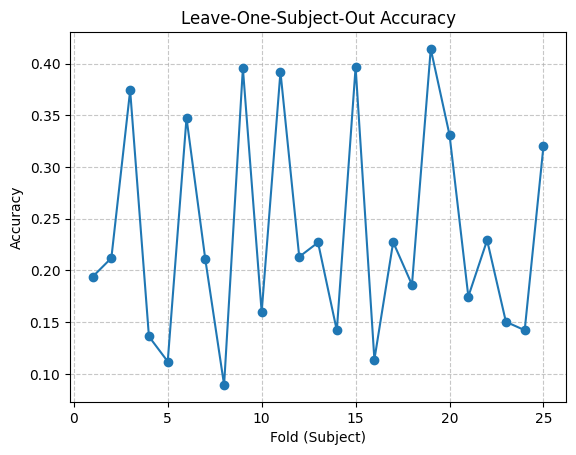

In [119]:



from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]
    
    from xgboost import XGBClassifier

    clf = XGBClassifier(n_estimators=100, max_depth=5, class_weight="balanced", random_state=42)
    clf.fit(train_features, train_labels)

    threshold = 0.7  # Custom threshold

    y_prob = clf.predict_proba(test_features)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)

    conf_matrix = confusion_matrix(test_labels, y_pred)
    specificities = []

    for i in range(conf_matrix.shape[0]):  # Iterate over each class
        tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)

    print(f"Specificities per class: {specificities}")
    print(f"Average Specificity: {np.mean(specificities)}") 


    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": np.mean(specificities),
    }

    fold_results.append(fold_metrics)


    print("-------------------------")

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Random forests

Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.16176470588235295
Precision: 0.8644031141868511
Recall: 0.16176470588235295
Confusion Matrix:
[[121   0   0   0   0   0]
 [155   0   0   0   0   0]
 [213   0   0   0   0   0]
 [172   0   0   0   0   0]
 [ 29   0   0   0   0   0]
 [ 58   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.19047619047619047
Precision: 0.8458049886621315
Recall: 0.19047619047619047
Confusion Matrix:
[[168   0   0   0   0   0]
 [190   0   0   0   0   0]
 [106   0   0   0   0   0]
 [254   0   0   0   0   0]
 [ 51   0   0   0   0   0]
 [113   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.37409200968523004
Precision: 0.7658528220251042
Recall: 0.37409200968523004
Confusion Matrix:
[[309   0   0   0   0   0]
 [125   0   0   0   0   0]
 [ 89   0   0   0   0   0]
 [251   0   0   0   0   0]
 [  8   0   0   0   0   0]
 [ 44   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.11386138613861387
Precision: 0.8991030291147927
Recall: 0.11386138613861387
Confusion Matrix:
[[ 92   0   0   0   0   0]
 [192   0   0   0   0   0]
 [181   0   0   0   0   0]
 [ 95   0   0   0   0   0]
 [ 49   0   0   0   0   0]
 [199   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.1033210332103321
Precision: 0.9073542026933185
Recall: 0.1033210332103321
Confusion Matrix:
[[ 84   0   0   0   0   0]
 [132   0   0   0   0   0]
 [ 56   0   0   0   0   0]
 [414   0   0   0   0   0]
 [ 39   0   0   0   0   0]
 [ 88   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.3474240422721268
Precision: 0.7732794228765778
Recall: 0.3474240422721268
Confusion Matrix:
[[263   0   0   0   0   0]
 [ 33   0   0   0   0   0]
 [ 76   0   0   0   0   0]
 [302   0   0   0   0   0]
 [ 46   0   0   0   0   0]
 [ 37   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.20540540540540542
Precision: 0.8367859751643536
Recall: 0.20540540540540542
Confusion Matrix:
[[190   0   0   0   0   0]
 [ 89   0   0   0   0   0]
 [261   0   0   0   0   0]
 [244   0   0   0   0   0]
 [ 25   0   0   0   0   0]
 [116   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.08158765159867695
Precision: 0.9250688932947101
Recall: 0.08158765159867695
Confusion Matrix:
[[ 74   0   0   0   0   0]
 [169   0   0   0   0   0]
 [120   0   0   0   0   0]
 [465   0   0   0   0   0]
 [ 32   0   0   0   0   0]
 [ 47   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.39555555555555555
Precision: 0.7609086419753086
Recall: 0.39555555555555555
Confusion Matrix:
[[356   0   0   0   0   0]
 [ 42   0   0   0   0   0]
 [ 89   0   0   0   0   0]
 [295   0   0   0   0   0]
 [ 52   0   0   0   0   0]
 [ 66   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.14930555555555555
Precision: 0.8729865933641975
Recall: 0.14930555555555555
Confusion Matrix:
[[129   0   0   0   0   0]
 [194   0   0   0   0   0]
 [ 58   0   0   0   0   0]
 [337   0   0   0   0   0]
 [ 31   0   0   0   0   0]
 [115   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.3908754623921085
Precision: 0.7619081647081362
Recall: 0.3908754623921085
Confusion Matrix:
[[317   0   0   0   0   0]
 [ 67   0   0   0   0   0]
 [143   0   0   0   0   0]
 [173   0   0   0   0   0]
 [ 16   0   0   0   0   0]
 [ 95   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.2131782945736434
Precision: 0.8322666907036836
Recall: 0.2131782945736434
Confusion Matrix:
[[165   0   0   0]
 [ 82   0   0   0]
 [260   0   0   0]
 [267   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.22707423580786026
Precision: 0.8244884727598634
Recall: 0.22707423580786026
Confusion Matrix:
[[208   0   0   0   0   0]
 [ 68   0   0   0   0   0]
 [200   0   0   0   0   0]
 [294   0   0   0   0   0]
 [ 16   0   0   0   0   0]
 [130   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.13054499366286437
Precision: 0.8864970017075728
Recall: 0.13054499366286437
Confusion Matrix:
[[103   0   0   0   0   0]
 [193   0   0   0   0   0]
 [ 36   0   0   0   0   0]
 [392   0   0   0   0   0]
 [ 32   0   0   0   0   0]
 [ 33   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.39902676399026765
Precision: 0.7601955943902771
Recall: 0.39902676399026765
Confusion Matrix:
[[328   0   0   0   0   0]
 [ 19   0   0   0   0   0]
 [ 58   0   0   0   0   0]
 [280   0   0   0   0   0]
 [  4   0   0   0   0   0]
 [133   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.08333333333333333
Precision: 0.923611111111111
Recall: 0.08333333333333333
Confusion Matrix:
[[ 71   0   0   0   0   0]
 [186   0   0   0   0   0]
 [ 47   0   0   0   0   0]
 [352   0   0   0   0   0]
 [ 43   0   0   0   0   0]
 [153   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.2247340425531915
Precision: 0.8257713473291082
Recall: 0.2247340425531915
Confusion Matrix:
[[169   0   0   0   0   0]
 [156   0   0   0   0   0]
 [208   0   0   0   0   0]
 [155   0   0   0   0   0]
 [ 20   0   0   0   0   0]
 [ 44   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.18181818181818182
Precision: 0.8512396694214877
Recall: 0.18181818181818182
Confusion Matrix:
[[166   0   0   0   0   0]
 [128   0   0   0   0   0]
 [122   0   0   0   0   0]
 [370   0   0   0   0   0]
 [ 46   0   0   0   0   0]
 [ 81   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.4155019059720457
Precision: 0.7571399278943569
Recall: 0.4155019059720457
Confusion Matrix:
[[327   0   0   0   0   0]
 [ 44   0   0   0   0   0]
 [ 70   0   0   0   0   0]
 [215   0   0   0   0   0]
 [  6   0   0   0   0   0]
 [125   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.32752613240418116
Precision: 0.77974723500346
Recall: 0.32752613240418116
Confusion Matrix:
[[282   0   0   0   0   0]
 [ 57   0   0   0   0   0]
 [226   0   0   0   0   0]
 [227   0   0   0   0   0]
 [ 18   0   0   0   0   0]
 [ 51   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.17146017699115043
Precision: 0.8579384153026862
Recall: 0.17146017699115043
Confusion Matrix:
[[155   0   0   0   0   0]
 [168   0   0   0   0   0]
 [113   0   0   0   0   0]
 [331   0   0   0   0   0]
 [ 30   0   0   0   0   0]
 [107   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.22925457102672292
Precision: 0.8233030873099239
Recall: 0.22925457102672292
Confusion Matrix:
[[163   0   0   0   0]
 [ 46   0   0   0   0]
 [369   0   0   0   0]
 [124   0   0   0   0]
 [  9   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.13365155131264916
Precision: 0.8842111858556285
Recall: 0.13365155131264916
Confusion Matrix:
[[112   0   0   0   0   0]
 [246   0   0   0   0   0]
 [100   0   0   0   0   0]
 [241   0   0   0   0   0]
 [ 33   0   0   0   0   0]
 [106   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.1422172452407615
Precision: 0.8780084996031094
Recall: 0.1422172452407615
Confusion Matrix:
[[127   0   0   0   0   0]
 [139   0   0   0   0   0]
 [ 62   0   0   0   0   0]
 [530   0   0   0   0   0]
 [ 15   0   0   0   0   0]
 [ 20   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Fold 25:
Accuracy: 0.31622746185852985
Precision: 0.783772345774958
Recall: 0.31622746185852985
Confusion Matrix:
[[228   0   0   0   0   0]
 [ 96   0   0   0   0   0]
 [140   0   0   0   0   0]
 [205   0   0   0   0   0]
 [ 23   0   0   0   0   0]
 [ 29   0   0   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Specificity: 0.8333333333333334
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.2284, Std: 0.1072
Precision - Mean: 0.8353, Std: 0.0539
Recall - Mean: 0.2284, Std: 0.1072
Specificity - Mean: 0.8287, Std: 0.0173


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


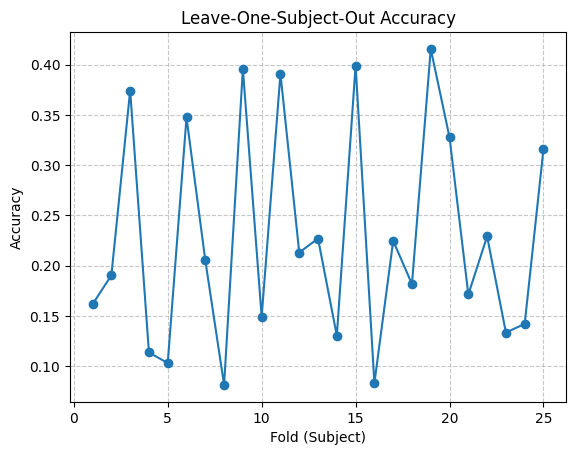

In [121]:

# 6 class

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]
    

    clf = RandomForestClassifier(n_estimators=71, max_depth=6, random_state=42)
    clf.fit(train_features, train_labels)

    threshold = 0.7  # Custom threshold

    y_prob = clf.predict_proba(test_features)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)

    conf_matrix = confusion_matrix(test_labels, y_pred)
    specificities = []

    for i in range(conf_matrix.shape[0]):  # Iterate over each class
        tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)

    print(f"Specificities per class: {specificities}")
    print(f"Average Specificity: {np.mean(specificities)}") 


    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": np.mean(specificities),
    }

    fold_results.append(fold_metrics)


    print("-------------------------")

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.16176470588235295
Precision: 0.8644031141868511
Recall: 0.16176470588235295
Confusion Matrix:
[[121   0   0   0]
 [155   0   0   0]
 [385   0   0   0]
 [ 87   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.19047619047619047
Precision: 0.8458049886621315
Recall: 0.19047619047619047
Confusion Matrix:
[[168   0   0   0]
 [190   0   0   0]
 [360   0   0   0]
 [164   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.37409200968523004
Precision: 0.7658528220251042
Recall: 0.37409200968523004
Confusion Matrix:
[[309   0   0   0]
 [125   0   0   0]
 [340   0   0   0]
 [ 52   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 4:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.11386138613861387
Precision: 0.8991030291147927
Recall: 0.11386138613861387
Confusion Matrix:
[[ 92   0   0   0]
 [192   0   0   0]
 [276   0   0   0]
 [248   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 5:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.1033210332103321
Precision: 0.9073542026933185
Recall: 0.1033210332103321
Confusion Matrix:
[[ 84   0   0   0]
 [132   0   0   0]
 [470   0   0   0]
 [127   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 6:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.3474240422721268
Precision: 0.7732794228765778
Recall: 0.3474240422721268
Confusion Matrix:
[[263   0   0   0]
 [ 33   0   0   0]
 [378   0   0   0]
 [ 83   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 7:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.20540540540540542
Precision: 0.8367859751643536
Recall: 0.20540540540540542
Confusion Matrix:
[[190   0   0   0]
 [ 89   0   0   0]
 [505   0   0   0]
 [141   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 8:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.08158765159867695
Precision: 0.9250688932947101
Recall: 0.08158765159867695
Confusion Matrix:
[[ 74   0   0   0]
 [169   0   0   0]
 [585   0   0   0]
 [ 79   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 9:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.39555555555555555
Precision: 0.7609086419753086
Recall: 0.39555555555555555
Confusion Matrix:
[[356   0   0   0]
 [ 42   0   0   0]
 [384   0   0   0]
 [118   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 10:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.14930555555555555
Precision: 0.8729865933641975
Recall: 0.14930555555555555
Confusion Matrix:
[[129   0   0   0]
 [194   0   0   0]
 [395   0   0   0]
 [146   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 11:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.3908754623921085
Precision: 0.7619081647081362
Recall: 0.3908754623921085
Confusion Matrix:
[[317   0   0   0]
 [ 67   0   0   0]
 [316   0   0   0]
 [111   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 12:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.2131782945736434
Precision: 0.8322666907036836
Recall: 0.2131782945736434
Confusion Matrix:
[[165   0   0]
 [ 82   0   0]
 [527   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 13:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.22707423580786026
Precision: 0.8244884727598635
Recall: 0.22707423580786026
Confusion Matrix:
[[208   0   0   0]
 [ 68   0   0   0]
 [494   0   0   0]
 [146   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 14:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.13054499366286437
Precision: 0.8864970017075728
Recall: 0.13054499366286437
Confusion Matrix:
[[103   0   0   0]
 [193   0   0   0]
 [428   0   0   0]
 [ 65   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 15:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.39902676399026765
Precision: 0.7601955943902771
Recall: 0.39902676399026765
Confusion Matrix:
[[328   0   0   0]
 [ 19   0   0   0]
 [338   0   0   0]
 [137   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 16:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.08333333333333333
Precision: 0.923611111111111
Recall: 0.08333333333333333
Confusion Matrix:
[[ 71   0   0   0]
 [186   0   0   0]
 [399   0   0   0]
 [196   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 17:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.2247340425531915
Precision: 0.8257713473291082
Recall: 0.2247340425531915
Confusion Matrix:
[[169   0   0   0]
 [156   0   0   0]
 [363   0   0   0]
 [ 64   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 18:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.18181818181818182
Precision: 0.8512396694214877
Recall: 0.18181818181818182
Confusion Matrix:
[[166   0   0   0]
 [128   0   0   0]
 [492   0   0   0]
 [127   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 19:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.4155019059720457
Precision: 0.7571399278943569
Recall: 0.4155019059720457
Confusion Matrix:
[[327   0   0   0]
 [ 44   0   0   0]
 [285   0   0   0]
 [131   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 20:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.32752613240418116
Precision: 0.77974723500346
Recall: 0.32752613240418116
Confusion Matrix:
[[282   0   0   0]
 [ 57   0   0   0]
 [453   0   0   0]
 [ 69   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 21:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.17146017699115043
Precision: 0.8579384153026862
Recall: 0.17146017699115043
Confusion Matrix:
[[155   0   0   0]
 [168   0   0   0]
 [444   0   0   0]
 [137   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 22:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.22925457102672292
Precision: 0.8233030873099239
Recall: 0.22925457102672292
Confusion Matrix:
[[163   0   0   0]
 [ 46   0   0   0]
 [493   0   0   0]
 [  9   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 23:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.13365155131264916
Precision: 0.8842111858556285
Recall: 0.13365155131264916
Confusion Matrix:
[[112   0   0   0]
 [246   0   0   0]
 [341   0   0   0]
 [139   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 24:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.1422172452407615
Precision: 0.8780084996031094
Recall: 0.1422172452407615
Confusion Matrix:
[[127   0   0   0]
 [139   0   0   0]
 [592   0   0   0]
 [ 35   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Fold 25:
Accuracy: 0.31622746185852985
Precision: 0.783772345774958
Recall: 0.31622746185852985
Confusion Matrix:
[[228   0   0   0]
 [ 96   0   0   0]
 [345   0   0   0]
 [ 52   0   0   0]]
Specificities per class: [0.0, 1.0, 1.0, 1.0]
Average Specificity: 0.75
-------------------------
Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.2284, Std: 0.1072
Precision - Mean: 0.8353, Std: 0.0539
Recall - Mean: 0.2284, Std: 0.1072
Specificity - Mean: 0.7467, Std: 0.0163


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


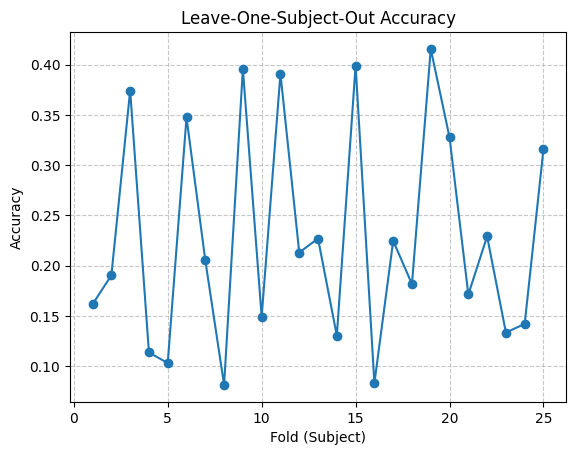

In [ ]:

# 4 class

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_4_stage_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]


    clf = RandomForestClassifier(n_estimators=71, max_depth=6, random_state=42)
    clf.fit(train_features, train_labels)

    threshold = 0.7  # Custom threshold

    y_prob = clf.predict_proba(test_features)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)

    conf_matrix = confusion_matrix(test_labels, y_pred)
    specificities = []
    

    for i in range(conf_matrix.shape[0]):  # Iterate over each class
        tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)

    print(f"Specificities per class: {specificities}")
    print(f"Average Specificity: {np.mean(specificities)}") 


    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": np.mean(specificities),
    }

    fold_results.append(fold_metrics)


    print("-------------------------")

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [123]:

# 3 class

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_3_stage_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]
    

    clf = RandomForestClassifier(n_estimators=71, max_depth=6, random_state=42, max_features= None, class_weight="balanced")
    clf.fit(train_features, train_labels)

    threshold = 0.7  # Custom threshold

    y_prob = clf.predict_proba(test_features)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)

    conf_matrix = confusion_matrix(test_labels, y_pred)
    specificities = []

    for i in range(conf_matrix.shape[0]):  # Iterate over each class
        tn = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)

    print(f"Specificities per class: {specificities}")
    print(f"Average Specificity: {np.mean(specificities)}") 


    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": np.mean(specificities),
    }

    fold_results.append(fold_metrics)


    print("-------------------------")

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.1858288770053476
Precision: 0.7206540162970999
Recall: 0.1858288770053476
Confusion Matrix:
[[121   0   0]
 [137  18   0]
 [429  43   0]]
Specificities per class: [0.09728867623604466, 0.927487352445194, 1.0]
Average Specificity: 0.6749253428937463
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.1984126984126984
Precision: 0.846095238095238
Recall: 0.1984126984126984
Confusion Matrix:
[[168   0   0]
 [183   7   0]
 [524   0   0]]
Specificities per class: [0.00980392156862745, 1.0, 1.0]
Average Specificity: 0.6699346405228758
-------------------------
Fold 3:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.37409200968523004
Precision: 0.7658528220251042
Recall: 0.37409200968523004
Confusion Matrix:
[[309   0   0]
 [125   0   0]
 [392   0   0]]
Specificities per class: [0.0, 1.0, 1.0]
Average Specificity: 0.6666666666666666
-------------------------
Fold 4:


KeyboardInterrupt: 

In [125]:
# 2 class

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

fold_results = []
fold = []

results = []
binary_subject_wise_data = list(zip(train_x_tsfel, y_binary_list))
for i, data in enumerate(binary_subject_wise_data):
    print(f"Fold {i+1}:")
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    clf = RandomForestClassifier(n_estimators=71, max_depth=6, class_weight="balanced", random_state=42, max_features= None)
    clf.fit(tsfel_x_train, y_train)

    y_prob = clf.predict_proba(test_features)[:, 1] 
    threshold = 0.7
    y_pred = (y_prob >= threshold).astype(int) 

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted', zero_division=1)
    recall = recall_score(test_labels, y_pred, average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(conf_matrix)


    tn, fp, fn, tp = confusion_matrix(test_labels, y_pred).ravel()
    specificity = tn / (tn+fp)
    print(f"Specificity: {specificity}")

    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)


    print("-------------------------")
    
    # if i in [0, 1, 15, 24]:
    #     plotter(test_results)
    # load_metrics(test_results)

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Fold 1:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.16176470588235295
Precision: 0.8644031141868512
Recall: 0.16176470588235295
Confusion Matrix:
[[121   0]
 [627   0]]
Specificity: 1.0
-------------------------
Fold 2:


d:\clg_stuff\ML project\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 